# Ford Go Bike 2018
### by Theresa Kocher

## Preliminary Wrangling

This document explores a dataset containing rent information of the bike rental agency of Ford.

In [533]:
import glob, os
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from IPython.core.display import Image, display
from mpl_toolkits.basemap import Basemap
from PIL import Image
import pylab as pl

%matplotlib inline

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,6)})
sns.set(font_scale=1.2)
sns.set_palette("pastel")
base_color = sns.color_palette()[0]

## 1. Gather Data
Gather data from local csv file.

In [2]:
# import downloaded csv files
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "data/*.csv"))), ignore_index=True, sort=True)

In [3]:
df.shape

(1863721, 16)

In [4]:
df.index.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


### What is the structure of your dataset?

> In 2018 there were 1863721 rent activities with 16 features (`bike_id`, `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`, `end_time`, `member_birth_year`, `member_gender`, `start_station_id`, `start_station_latitute`, `start_station_longitude`, `start_station_name`, `start_time` and `user_type`).

> The variables for ids (bike and station id) are integer variables. There are more numeric variables of type float (end_station_id, start_station_id, end_station_latitude, end_station_longitude, start_station_latitude, start_station_longitude and member_birth_year). The other variables are string variables. Not all variable types are the best choice for their content.


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out:
1. if there are missings in the dataset and if I can programmatically fill the missings with useful values. 
2. where the rent stations are located on the map and how busy this rent stations are.
3. and if there are clustering centers of rent stations and if yes if their users distinguish from each other.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1. For the investigation of the missings I need to figure out the variables with missings first. I will then investigate if I can fill the missings with obvious values. (in variables: `start_station_id`, `start_station_name` and `end_station_id`, `end_station_name`)

> 2. To figure out the location of the stations the variables `end_station_latitude`, `end_station_longitude`, `start_station_latitute` and `start_station_longitude` will be of interest. And to figure out how busy each station is, the amount of rents per each station id is needed.

> 3. To figure out if there are clustering centers of all stations also the variables `start_station_latitute`, `start_station_longitude` are of interest. For the analysis if there are differences between members in different regions (clusters) the columns `member_birth_year` and `member_gender` are needed.

## 2. Assess Data

### Data overview and univariate explorations




### 2.1 general information

In [6]:
df.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [8]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.753003e+06,1.851950e+06,1.863721e+06,1.863721e+06
mean,2.296851e+03,8.573026e+02,1.181730e+02,3.776690e+01,-1.223487e+02,1.983088e+03,1.196744e+02,3.776678e+01,-1.223492e+02
std,1.287733e+03,2.370379e+03,1.004403e+02,1.056483e-01,1.650597e-01,1.044289e+01,1.003976e+02,1.057689e-01,1.654634e-01
min,1.100000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.881000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,1.225000e+03,3.500000e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.978000e+03,3.300000e+01,3.777106e+01,-1.224114e+02
50%,2.338000e+03,5.560000e+02,8.800000e+01,3.778127e+01,-1.223971e+02,1.985000e+03,8.900000e+01,3.778107e+01,-1.223974e+02
75%,3.333000e+03,8.720000e+02,1.830000e+02,3.779728e+01,-1.222894e+02,1.991000e+03,1.860000e+02,3.779625e+01,-1.222865e+02
max,6.234000e+03,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.810000e+02,4.551000e+01,-7.357000e+01


### 2.2 Missings in variables

Exploring the missings of variables with explorated visualizations.

In [9]:
# missings in variables
df.isnull().sum()

bike_id                         0
bike_share_for_all_trip         0
duration_sec                    0
end_station_id              11771
end_station_latitude            0
end_station_longitude           0
end_station_name            11771
end_time                        0
member_birth_year          110718
member_gender              110367
start_station_id            11771
start_station_latitude          0
start_station_longitude         0
start_station_name          11771
start_time                      0
user_type                       0
dtype: int64

In [10]:
# missings in variables
df.isnull().sum()/df.shape[0]

bike_id                    0.000000
bike_share_for_all_trip    0.000000
duration_sec               0.000000
end_station_id             0.006316
end_station_latitude       0.000000
end_station_longitude      0.000000
end_station_name           0.006316
end_time                   0.000000
member_birth_year          0.059407
member_gender              0.059219
start_station_id           0.006316
start_station_latitude     0.000000
start_station_longitude    0.000000
start_station_name         0.006316
start_time                 0.000000
user_type                  0.000000
dtype: float64

Are all missings in station columns `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name` in the same rows?

In [11]:
(df['end_station_id'].isnull() == df['start_station_id'].isnull()).sum()

1863721

In [12]:
(df['end_station_id'].isnull() == df['end_station_name'].isnull()).sum()

1863721

In [13]:
(df['start_station_id'].isnull() == df['start_station_name'].isnull()).sum()

1863721

All variables `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name` have missings in the same rows.

Latitude and longitude in rent activities where station id is missing:

In [14]:
df[df['start_station_id'].isnull()][['start_station_latitude', 'start_station_longitude']].head()

,start_station_latitude,start_station_longitude
106718,37.42,-121.94
106976,37.41,-121.95
107137,37.41,-121.94
107264,37.41,-121.95
107593,37.38,-121.94


In [15]:
df[df['end_station_id'].isnull()][['end_station_latitude', 'end_station_longitude']].head()

,end_station_latitude,end_station_longitude
106718,37.41,-121.94
106976,37.41,-121.94
107137,37.41,-121.95
107264,37.41,-121.96
107593,37.38,-121.93


In [16]:
df['end_station_latitude'].min(), df['end_station_latitude'].mean(), df['end_station_latitude'].max()

(37.26331, 37.766900334477064, 45.51)

In [17]:
df['end_station_longitude'].min(), df['end_station_longitude'].mean(), df['end_station_longitude'].max()

(-122.473658, -122.34866070111464, -73.57)

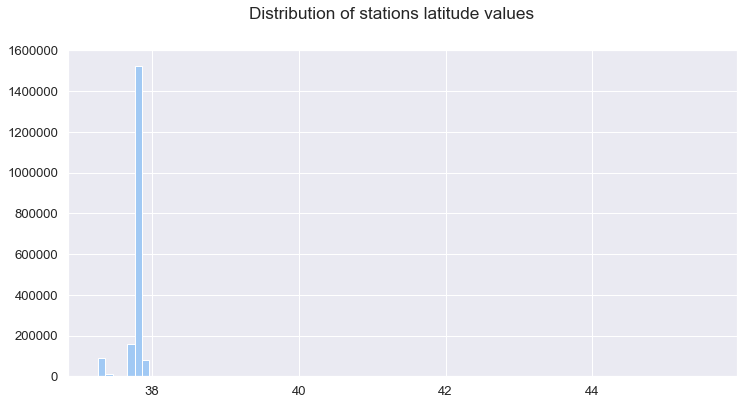

In [42]:
bins = np.arange(df['end_station_latitude'].min(), df['end_station_latitude'].max()+0.1, 0.1)
axes = df['end_station_latitude'].hist(bins=bins)
pl.suptitle("Distribution of stations latitude values");

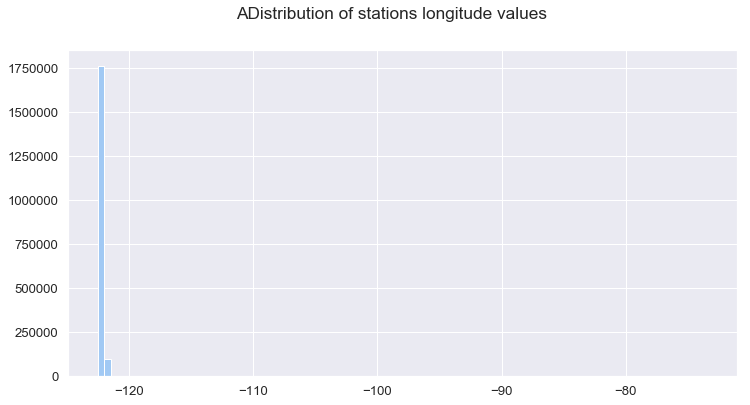

In [43]:
bins = np.arange(df['end_station_longitude'].min(), df['end_station_longitude'].max()+0.5, 0.5)
axes = df['end_station_longitude'].hist(bins=bins)
pl.suptitle("ADistribution of stations longitude values");


There are 11771 missings in columns `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name`. But the latitude and longitude of the start and end stations are available in those rows.

When looking into this latitude and longitude values of the 11771 rows where the station names and ids are missing, then we see, that those values are in a valid range.

When we look at the values of the longitude and latitude of the rows with missing station id and name and the plots of the distribution of longitude and latitude of all stations, we can see that the values are in an expecting range.

So we can assume, that the station id and name is already contained in the data. And this is the reason, why we can fill the missings with reasonable values, with the following approaches.




###### First Approach:
- Extract station id and name from stations with the same longitude and latitude values but with existing station id and name.

--> This didn't worked, because there is no station with the exact same longitude and latitude values as in the missing rows.


###### Second Approach (implemented in the Analysis further below):
- Compute the euclidean distance to every latitude and longitude of existing stations (with valid id and name) and set the missing station id and name to the closest station's name and id.


### 2.3 Values and distribution of variables

Exploring the values of the variables.

In [27]:
df['bike_share_for_all_trip'].value_counts()

No     1701386
Yes     162335
Name: bike_share_for_all_trip, dtype: int64

In [28]:
df['bike_id'].duplicated().any()

True

In [29]:
df['member_gender'].value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

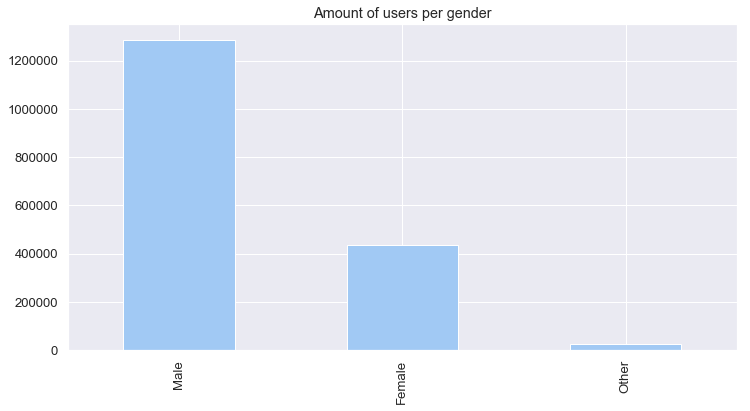

In [44]:

df['member_gender'].value_counts().plot(kind='bar', title='Amount of users per gender');

Only 1/3 of the users are female. 2/3 are male. And a few are of other gender.

In [45]:
df['user_type'].value_counts()

Subscriber    1583554
Customer       280167
Name: user_type, dtype: int64

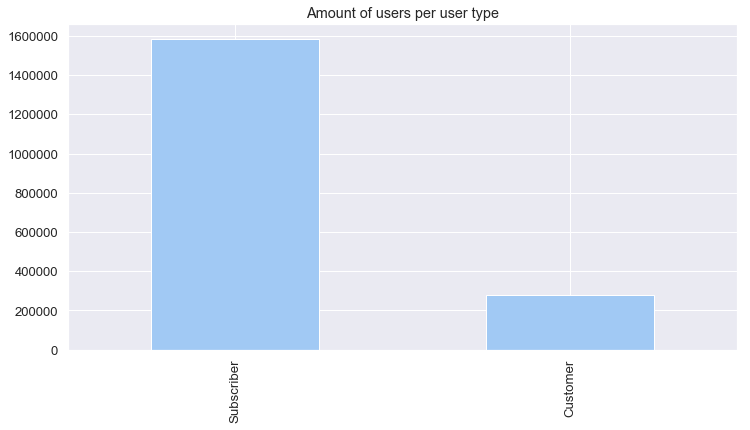

In [46]:
df['user_type'].value_counts().plot(kind='bar', title='Amount of users per user type');

4/5 of the users are subsricber. And 1/5 are customer users.

In [47]:
print("Birth year minimum: ", int(df['member_birth_year'].min()), "\nBirth year maximum: ", int(df['member_birth_year'].max()))

Birth year minimum:  1881 
Birth year maximum:  2000


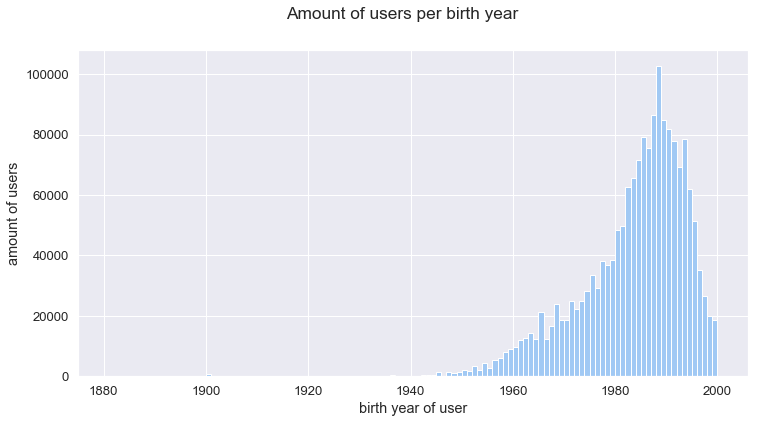

In [48]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+1, 1)
axes = df['member_birth_year'].hist(bins=bins)
plt.xlabel('birth year of user')
plt.ylabel('amount of users')
pl.suptitle("Amount of users per birth year");

The birth year of the members are inbetween 1881 and 2000. Especially the years between 1881 and about 1940 are questionable, if the bike user was really that old at rent time. This variable has to be cleaned with a reasonable threshold.

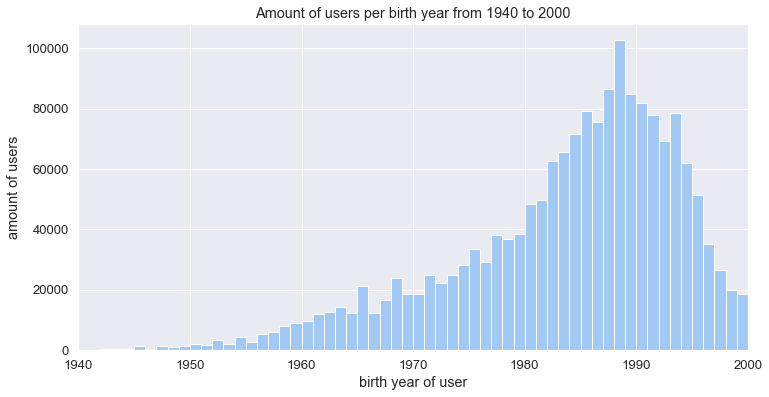

In [54]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+1, 1)
plt.hist(df['member_birth_year'], bins = bins)
plt.xlabel('birth year of user')
plt.ylabel('amount of users')
plt.xlim(1940, df['member_birth_year'].max()) # could also be called as plt.xlim((0, 35));
plt.title('Amount of users per birth year from 1940 to 2000');

This distribution of the birth year of users seems more reasonable. It is a left skewed distribution.

In [55]:
print("Minimum of start timestamp: ", pd.to_datetime(df['start_time']).min())
print("Minimum of end timestamp: ", pd.to_datetime(df['end_time']).min())

print("Maximum of start timestamp: ", pd.to_datetime(df['start_time']).max())
print("Maximum of end timestamp: ", pd.to_datetime(df['end_time']).max())

Minimum of start timestamp:  2018-01-01 00:01:53.847000
Minimum of end timestamp:  2018-01-01 00:10:06.241000
Maximum of start timestamp:  2018-12-31 23:59:12.097000
Maximum of end timestamp:  2019-01-01 15:05:21.558000


The maximum end timestamp is already in 2019. But the maximum start timestamp is still in 2018, it is reasonable, that a bike was rent until the next day. And it seems like the data set of 2018 was filtered by start timestamp. Which is not a problem.

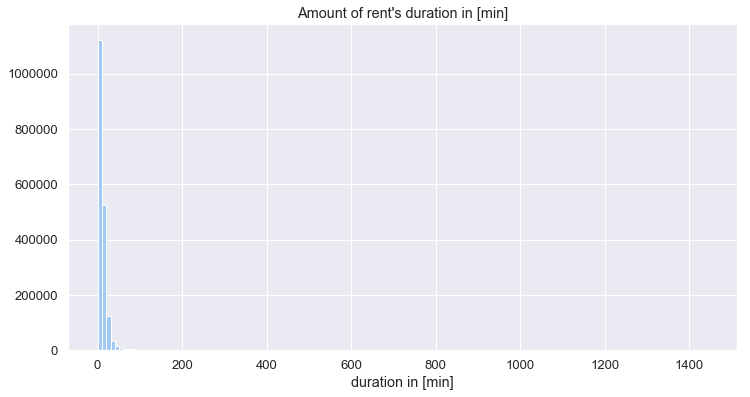

In [57]:
duration_mins = df['duration_sec']/60 # duration time in minutes
edges = np.arange(duration_mins.min(), duration_mins.max()+10, 10)
plt.hist(duration_mins, bins = edges)
plt.xlabel('duration in [min]')
plt.title("Amount of rent's duration in [min]");

In [58]:
duration_mins.max()

1439.4333333333334

The durations of every rent activity lie between 0 and 1439 minutes (after converting to minutes). But the most bikes are only rent for about 0 - 30 minutes, as we can see in the next diagram:

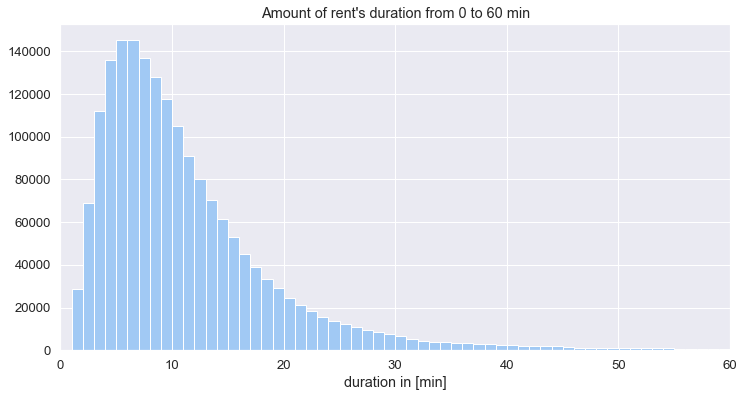

In [53]:
#duration_hours = df['duration_sec']/60/60  # duration time in hours
duration_mins = df['duration_sec']/60 # duration time in minutes
edges = np.arange(duration_mins.min(), duration_mins.max()+1, 1)
plt.hist(duration_mins, bins = edges)
plt.xlabel('duration in [min]')
plt.xlim(0, 60) 
plt.title("Amount of rent's duration from 0 to 60 min");

This is the more interesting range of duration.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> `duration_sec`: The durations of every rent activity lie between 0 and 1439 minutes (after converting to minutes). But the most bikes are only rent for about 0 - 30 minutes.

> `end_station_latitude`, `end_station_longitude`, `start_station_latitude` and `start_station_longitude`:
See this interpretion of the distribution plot above in the missing section.

> `member_birth_year`: The birth year of the members are inbetween 1881 and 2000. Especially the years between 1881 and about 1940 are questionable, if the bike user was really that old at rent time. This variable has to be cleaned with a reasonable threshold.

> `member_gender`: Only about 1/3 of the users are female. 2/3 are male.

> `user_type`: 4/5 of the users are subscriber. 1/5 are customer.


### Is there the need to tidy, clean, adjust or change the form of the data? If so, why?


**Tidyness issues**:
- We can not move the membeer observations (`member_birth_year`, `member_gender` and `user_type`) into another table, because we don't have member id's. This is why we keep the member information as part of the rent observations.
- The observation of the rent activity will keep the member's information (birth year, gender, user type) since it is only available in relation to the rent activity and not referable to individual members.
- But the station information should be in another table (`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`). Where start and end is not necessary anymore. Only to reference the station by id for start and end station in the main rent table (`start_station_id` and `end_station_id`).
 

**Quality issues**:
- `bike_share_for_all_trip` is string. It should be of type bool.
- `end_time` and `start_time` are string, must be of data type datetime.
- Same amount of missings in `end_station_id`, `end_station_name`, `start_station_id` and `start_station_name`, also all missings in the same rows. Those can be replaced by obvious values when searching comparable latitude and logitude values of other stations.
-  There are missings in `start_station_id` and `end_station_id`. This is why it both are of type float instead of integer. Must be converted to integer after missings are replaced by obvious values (nearest station's id and name).
-  There are missings in `member_birth_year`. This is why it is a float type instead of integer. Will be kept to not loose NaN values.
- There are outliers in the variable `member_birth_year`.
- About 5.9 % missings in the variables `member_birth_year` and `member_gender`.

## 3. Tidying + Cleaning

### Testing also with data overview or univariate explorations

### Which operations on the data to tidy, adjust, or change the form of the data do you need to perform?


#### Tidying
1. There are three observations: **rent activity** information, **member** informations and **rent stations** information:
    - Due to anonymization the **member** information is not enough to extract each individual member into a member data base. The member information we have in each row is not obviously/distinctly referable to one single member. But we can extract the members information per rent activity in a seperated table and add a rent_id. With this table we can make analysis of members in the view of general users (considering every acitivity is a new user). Due to the fact that we don't have individual member ids, we can not derive an individual member table. This is why, we don't know, for example, if less people use the rent service really often or,the other way around, if there are a lot of users using the service only one time or all inbetween. Copy `member_birth_year`, `member_gender` and `user_type` to that table.
    - The **rent activity** table will keep columns: `bike_id`, `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `end_time`, `start_station_id`, `start_time`.
    - The **rent stations** information wil be moved into another table, where station_id, station_latitude, station_longitude and station_name are merged toegehther from both: start_ and end_stations.(`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`).


#### Cleaning

2. Convert type of `bike_share_for_all_trip` to data type bool. 
3. Convert types of `end_time` and `start_time` to data type datetime. 
4. Fill missings in variables `start_station_id`, `end_station_id`, `end_station_name` and `start_station_name`. For every row with those missings: 
    - Search in the station dataframe for rows, with same or similar (smallest Euclidean distance) `station_latitude`, `station_longitude` data.
    - And if there exist such rows: use their `station_id` and `station_name` to fill in the rent dataframe the missings.
    - Otherwise: Delete row (station id not known). 
5. Then convert `start_station_id` and `end_station_id`to type integer.
6. There are a lot of outliers in the variable `member_birth_year`. Find a threshold, that is realistic. And delete values (set to NaN) below that threshold. 


### 3.1 Tidying

In [63]:
df_clean = df.copy()

<span style="color:blue">Define:</span>

1. There are three observations: **rent activity** information, **member** informations and **rent stations** information:
    - But we can extract the **members information per rent activity** in a seperated table and add a rent_id. 
    - The **rent activity** table will keep columns: `bike_id`, `bike_share_for_all_trip`, `duration_sec`, `end_station_id`, `end_time`, `member_birth_year`, `member_gender`, `start_station_id`, `start_time`, `user_type`.
    - The **rent stations** information wil be moved into another table, where station_id, station_latitude, station_longitude and station_name are merged toegehther from both: start_ and end_stations.(`start_station_id`, `start_station_latitude`, `start_station_longitude`, `start_station_name`, `end_station_id`, `end_station_latitude`, `end_station_longitude`, `end_station_name`).




<span style="color:purple">Code:</span>

In [64]:
df_clean['rent_id'] = df_clean.index # unique?
rent_df = df_clean[['rent_id', 'bike_id', 'bike_share_for_all_trip', 'duration_sec', 'start_station_id', 'start_time', 'end_station_id', 'end_time']].copy()
member_df = df_clean[['rent_id', 'member_gender', 'member_birth_year', 'user_type']].copy()
station_temp_df = df_clean[['start_station_id', 'start_station_latitude', 'start_station_longitude', 'start_station_name', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'end_station_name']].copy()

Extract the station's information to one dataframe independent if it was start or end station.

In [65]:
start_station_df = pd.DataFrame()
end_station_df = pd.DataFrame()

start_station_df['id'] = station_temp_df['start_station_id']
start_station_df['latitude'] = station_temp_df['start_station_latitude']
start_station_df['longitude'] = station_temp_df['start_station_longitude']
start_station_df['name'] = station_temp_df['start_station_name']
start_station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)

end_station_df['id'] = station_temp_df['end_station_id']
end_station_df['latitude'] = station_temp_df['end_station_latitude']
end_station_df['longitude'] = station_temp_df['end_station_longitude']
end_station_df['name'] = station_temp_df['end_station_name']
end_station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)

# merge start und end stations
station_df = start_station_df.append(end_station_df)

# drop duplicates
station_df.drop_duplicates(subset=['id', 'latitude', 'longitude', 'name'], inplace=True)
# drop if nan in 'id' and 'name'
station_df.dropna(subset=['id', 'name'], inplace=True)


<span style="color:LightSeaGreen">Test:</span>

In [66]:
print('df_clean shape: ', df_clean.shape)
print('rent_df shape: ', rent_df.shape)
print('member_df shape: ', member_df.shape)
print('station_df shape: ', station_df.shape)

df_clean shape:  (1863721, 17)
rent_df shape:  (1863721, 8)
member_df shape:  (1863721, 4)
station_df shape:  (358, 4)


In [67]:
# is rent id in both tables unique?
print(df_clean.index.duplicated().sum())
print(rent_df['rent_id'].duplicated().sum())
print(member_df['rent_id'].duplicated().sum())

0
0
0


The observations were extracted to 3 tables: **rent_df**, **member_df** and **station_df**.

### 3.2. Cleaning

Copying each dataframe for cleaning.

In [70]:
rent_clean = rent_df.copy()
member_clean = member_df.copy()
station_clean = station_df.copy()

<span style="color:blue">Define:</span>

2. Convert type of `bike_share_for_all_trip` to data type bool. 

<span style="color:purple">Code:</span>

In [157]:
rent_clean['bike_share_for_all_trip'].unique()

array([0, 1])

In [158]:
rent_clean['bike_share_for_all_trip'] = rent_clean['bike_share_for_all_trip'].replace({'Yes': True, 'No': False})
rent_clean['bike_share_for_all_trip'] = rent_clean['bike_share_for_all_trip'].astype(bool)

<span style="color:LightSeaGreen">Test:</span>

In [159]:
rent_clean['bike_share_for_all_trip'].unique()

array([False,  True])

In [160]:
rent_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 11 columns):
rent_id                    int64
bike_id                    int64
bike_share_for_all_trip    bool
duration_sec               int64
start_station_id           int64
start_time                 object
end_station_id             int64
end_time                   object
year                       int64
month                      int64
hour                       int64
dtypes: bool(1), int64(8), object(2)
memory usage: 144.0+ MB


<span style="color:blue">Define:</span>

3. Convert types of `end_time` and `start_time` to data type datetime. 

<span style="color:purple">Code:</span>

In [161]:
rent_clean['end_time'] = pd.to_datetime(rent_clean['end_time'])
rent_clean['start_time'] = pd.to_datetime(rent_clean['start_time'])

<span style="color:LightSeaGreen">Test:</span>

In [162]:
rent_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 11 columns):
rent_id                    int64
bike_id                    int64
bike_share_for_all_trip    bool
duration_sec               int64
start_station_id           int64
start_time                 datetime64[ns]
end_station_id             int64
end_time                   datetime64[ns]
year                       int64
month                      int64
hour                       int64
dtypes: bool(1), datetime64[ns](2), int64(8)
memory usage: 144.0 MB


<span style="color:blue">Define:</span>

4. Fill missings in variables `start_station_id`, `end_station_id`, `end_station_name` and `start_station_name`. For every row with those missings: 
    - Search in the station dataframe for rows, with same or similar (smallest Euclidean distance) `station_latitude`, `station_longitude` data.
    - And if there exist such rows: use their `station_id` and `station_name` to fill in the rent dataframe the missings.
    - Otherwise: Delete row (station id not known). 

<span style="color:purple">Code:</span>

We need to find the closest longitude latitude point (station) for every given longitude, latitude values to find the most realistic sation id and name for the missings in `station_id` and `station_name` of a rent. (euclidean distance computation from: https://stackoverflow.com/questions/41336756/find-the-closest-latitude-and-longitude)

In [88]:
from math import cos, asin, sqrt

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

def closest_start(data, location):
    return min(data, key=lambda lookupStation: distance(location['start_station_latitude'],location['start_station_longitude'], lookupStation['latitude'],lookupStation['longitude']))

def closest_end(data, location):
    return min(data, key=lambda lookupStation: distance(location['end_station_latitude'],location['end_station_longitude'], lookupStation['latitude'],lookupStation['longitude']))

tempDataList = [{'lat': 39.7612992, 'lon': -86.1519681}, 
                {'lat': 39.762241,  'lon': -86.158436 }, 
                {'lat': 39.7622292, 'lon': -86.1578917}]

#location = {'lat': 39.7622290, 'lon': -86.1519750}
#print(closest(lookupStation, location))

In [89]:
# all 4 variables are null in the same row (see 2. Assessing Data)
# the connection between latitude and longitude have to be looked up un the data_clean df,
# because there are the only connection, between missing rent_id and longitude/latitude

where_station_id_name_is_missing = df_clean['start_station_id'].isnull()

# here in df_clean is the only combination of old longitude and latitude in whole dataframe
df_id_missings = df_clean[where_station_id_name_is_missing]
print(df_id_missings.shape[0], " rent activities with missing start and end station id and name.")

# new dataframe with latitude and longitude as dictionaries
lookupStation = [{'latitude': row['latitude'], 'longitude': row['longitude']} for i, row in station_clean.iterrows()]

for i, row in df_id_missings.iterrows():
    # find the closest station (euclidean distance)
    start_station = closest_start(lookupStation, row)
    end_station = closest_end(lookupStation, row)
    # extract closest station
    start_latitude = start_station['latitude']
    start_longitude = start_station['longitude']
    end_latitude = end_station['latitude']
    end_longitude = end_station['longitude']
    
    # search for the same station with the longitude and latitude information (search in smaller station dataframe)
    start_station_id_frame = station_clean.query('latitude==@start_latitude & longitude==@start_longitude')
    start_station_id = start_station_id_frame['id'].iloc[0]
    #start_station_name = start_station_id_frame['start_station_name'].iloc[0]
    end_station_id_frame = station_clean.query('latitude==@end_latitude & longitude==@end_longitude')
    end_station_id = end_station_id_frame['id'].iloc[0]
    
    #print(start_station_id)
    #print(end_station_id)
    
    # write the found station id and name to replace missings in the rent_clean dataframe
    rent_clean.loc[i, 'start_station_id'] = start_station_id
    rent_clean.loc[i, 'end_station_id'] = end_station_id
    
    #print("start, end: ", start_station_id, start_station_id)
    #print(" ",end_station_id_frame)
    

11771  rent activities with missing start and end station id and name.


<span style="color:LightSeaGreen">Test:</span>

In [90]:
print('BEFORE')
print("Missing in rent_df start: ", rent_df['start_station_id'].isnull().sum())
print("Missing in rent_df start: ", rent_df['end_station_id'].isnull().sum())

print('AFTER')
print("Missing in rent_clean start: ", rent_clean['start_station_id'].isnull().sum())
print("Missing in rent_clean start: ", rent_clean['end_station_id'].isnull().sum())

BEFORE
Missing in rent_df start:  11771
Missing in rent_df start:  11771
AFTER
Missing in rent_clean start:  0
Missing in rent_clean start:  0


<span style="color:blue">Define:</span>

5. Then convert `start_station_id` and `end_station_id`to type integer.

<span style="color:purple">Code:</span>



In [91]:
type(rent_clean['start_station_id'][0])

numpy.float64

In [92]:
rent_clean['start_station_id'] = rent_clean['start_station_id'].astype(int)
rent_clean['end_station_id'] = rent_clean['end_station_id'].astype(int)

<span style="color:LightSeaGreen">Test:</span>

In [93]:
type(rent_clean['start_station_id'][0])

numpy.int64

<span style="color:blue">Define:</span>

6. There are a lot of outliers in the variable `member_birth_year`. Find a threshold, that is realistic. And delete values (set to NaN) below that threshold. 

<span style="color:purple">Code:</span>

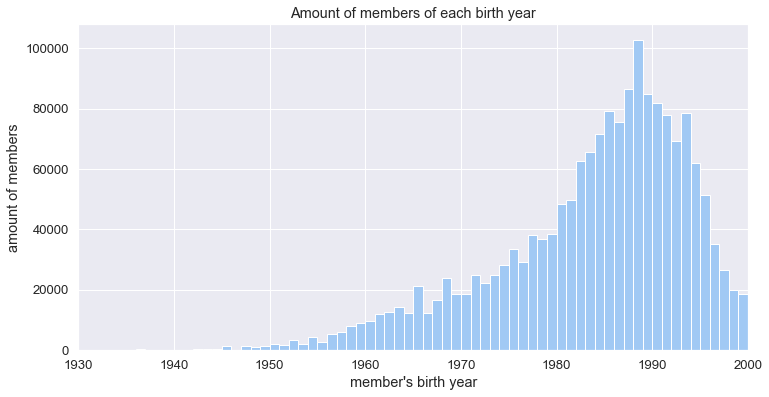

In [94]:
bins = np.arange(member_clean['member_birth_year'].min(), member_clean['member_birth_year'].max()+1, 1)
plt.hist(member_clean['member_birth_year'], bins = bins)
plt.xlabel("member's birth year")
plt.xlim(1930, member_clean['member_birth_year'].max()) 
plt.ylabel('amount of members')
plt.title('Amount of members of each birth year');

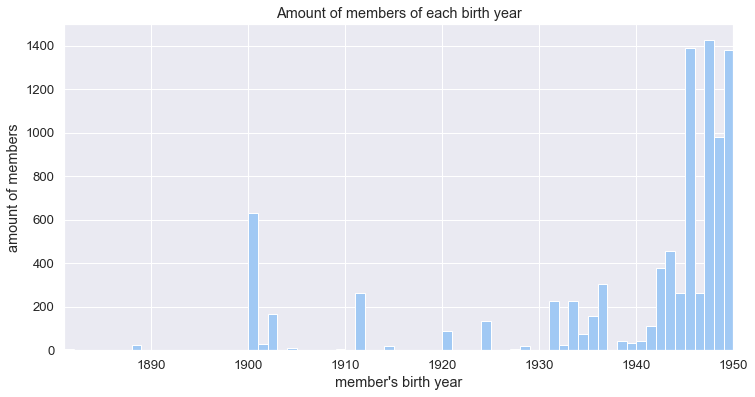

In [95]:
bins = np.arange(member_clean['member_birth_year'].min(), member_clean['member_birth_year'].max()+1, 1)
plt.hist(member_clean['member_birth_year'], bins = bins)
plt.xlabel("member's birth year")
plt.xlim(member_clean['member_birth_year'].min(), 1950)
plt.ylabel('amount of members')
plt.ylim(0, 1500)
plt.title('Amount of members of each birth year');

In [97]:
int(member_clean['member_birth_year'].min()), int(member_clean['member_birth_year'].max())

(1881, 2000)


**What about the peak in 1900?**
- There are multiple (almost 1000) users that set their birth years to 1900.


**If this birth years were true, how old would those user be now?**
- The oldest user would be 137.  


**Are those outliers realistic?**
- The peak of birth year in the 1900 is not that realistic. It is more probable that this comes from an initial birth year set by the system or may also from user fabricating an uncreative fake birth year.

- An age of 137 is really sporty and also using a shared bike service in that age, really honorable! But not really realistic-I would guess.

**Problem:**
- But what would be a realistic age that is trustable? Where do we set a threshold, which data do we want to trust, and which we don't?

**Assumption**
- While looking at the distribution of the outliers of birth years, we assume the threshold 1930 (with a maximum age of 88) is realistic. 

In [99]:
where_birth_year_smaller_1930 = member_clean['member_birth_year'] < 1930
member_clean.loc[where_birth_year_smaller_1930, 'member_birth_year'] = np.NaN

<span style="color:LightSeaGreen">Test:</span>

In [100]:
member_clean['member_birth_year'].min()

1930.0

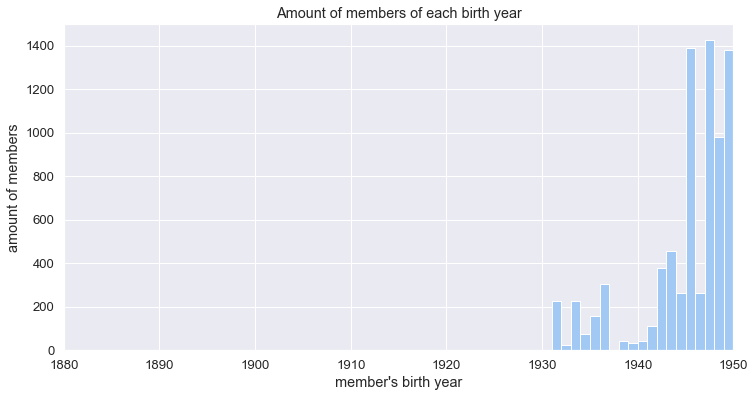

In [101]:
bins = np.arange(member_clean['member_birth_year'].min(), member_clean['member_birth_year'].max()+1, 1)
plt.hist(member_clean['member_birth_year'], bins = bins)
plt.xlabel("member's birth year")
plt.xlim(1880, 1950)
plt.ylabel('amount of members')
plt.ylim(0, 1500)
plt.title('Amount of members of each birth year');

### 3.3 Feature Development

<span style="color:blue">Define:</span>

We can extract informations of the given variables to generate new features:
- year of renting in rent table
- month of renting in rent table
- daytime (in hour) of renting in rent table
- age of the member in member table



<span style="color:purple">Code:</span>

In [103]:
print(rent_clean.shape[0])
print(member_clean.shape[0])

1863721
1863721


In [104]:
rent_clean['year'] = rent_clean['start_time'].dt.year
rent_clean['month'] = rent_clean['start_time'].dt.month
rent_clean['hour'] = rent_clean['start_time'].dt.hour

In [105]:
# approximate age at rent time, since only year of birth is known, not month
# therefore rent time is needed
member_clean['age'] = rent_clean['year'] - member_clean['member_birth_year']

<span style="color:LightSeaGreen">Test:</span>

In [106]:
rent_clean['year'].value_counts()

2018    1863721
Name: year, dtype: int64

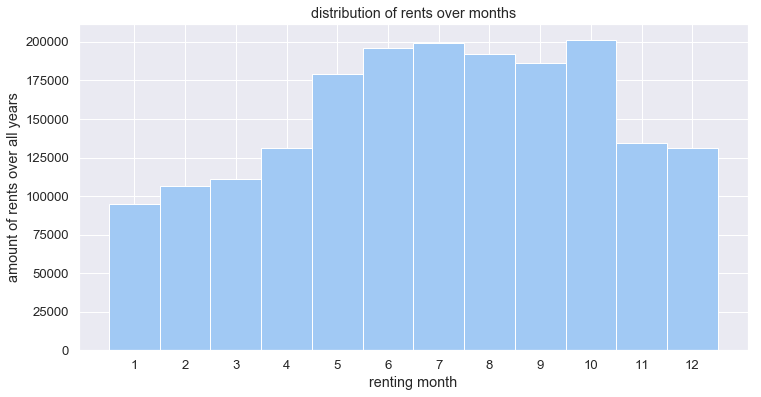

In [124]:
bins = np.arange(rent_clean['month'].min()-0.5, rent_clean['month'].max()+1.1-0.5, 1)
plt.hist(rent_clean['month'], bins = bins)
plt.xlabel("renting month")
plt.xticks(np.arange(rent_clean['month'].min(), rent_clean['month'].max()+1, 1))
plt.ylabel('amount of rents over all years')
#plt.ylim(0, 1500)
plt.title('distribution of rents over months');

There are much more rents in the month from May to October. The most rents are in October. And there are notieable less in November compared to the month before. Maybe this depends on a weather change in this month. Therefore addtional data like weather data could be analyzed in a further research. A bias what is also not considered, is the average member amount in each month. Maybe the bike rent service got more popular over this year. Then there would been more rents at the end of the year (December) than in the beginning (January). But this data is not available, since we dan't have member ids. We can not distinguish between member amount and seasonal usage amount.

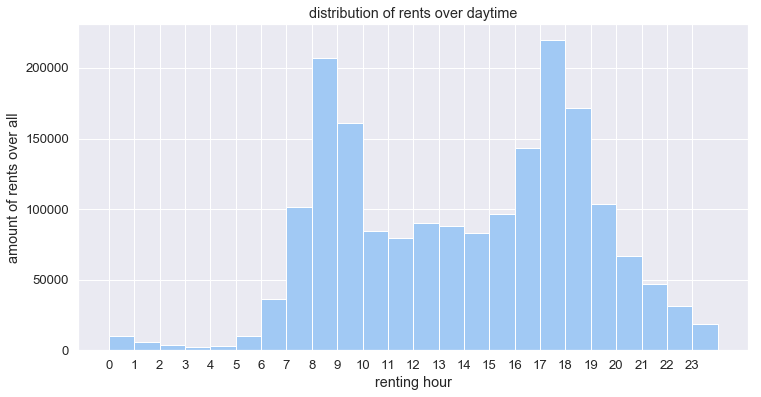

In [132]:
bins = np.arange(rent_clean['hour'].min(), rent_clean['hour'].max()+1.1, 1)
plt.hist(rent_clean['hour'], bins = bins)
plt.xlabel("renting hour")
plt.xticks(np.arange(0, rent_clean['hour'].max()+1, 1))
plt.ylabel('amount of rents over all')
#plt.ylim(0, 1500)
plt.title('distribution of rents over daytime');

There are much more rents in the ruch hours between 7-10 o'clock and 16-19 o'clock. Also at daytime (6-22 o'clock) are much more rents than in the night (between 22 and 6 o'clock).

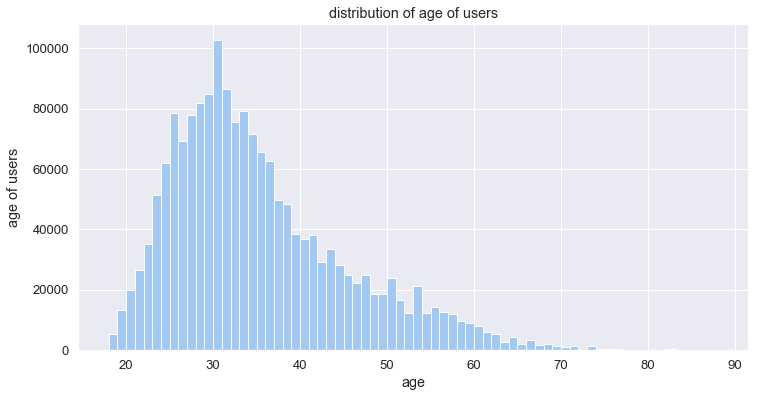

In [133]:
bins = np.arange(member_clean['age'].min(), member_clean['age'].max()+1, 1)
plt.hist(member_clean['age'], bins = bins)
plt.xlabel("age")
#plt.xlim(1880, 1950)
plt.ylabel('age of users')
#plt.ylim(0, 1500)
plt.title('distribution of age of users');

In [135]:
member_clean['age'].min(), member_clean['age'].max()

(18.0, 88.0)

The age of the useres is right-skewed distributed. The most users are about 30 years old. The youngest is 18 years old (what may due to a user's contract requirement) and the oldest is 88 years old (after cleaning older members from data).

### 3.4 Store cleaned and tidied data

In [136]:
rent_clean.to_csv('data/cleaned/rent.csv', index=False)
member_clean.to_csv('data/cleaned/member.csv', index=False)
station_clean.to_csv('data/cleaned/station.csv', index=False)

In [137]:
conn = sqlite3.connect("data/cleaned/rent.db")
rent_clean.to_sql("rent", conn, if_exists="replace", index=False)

conn = sqlite3.connect("data/cleaned/member.db")
member_clean.to_sql("member", conn, if_exists="replace", index=False)

conn = sqlite3.connect("data/cleaned/station.db")
station_clean.to_sql("station", conn, if_exists="replace", index=False)

Skipp reading from database, because then all type conversions are lost.

In [154]:
#conn = sqlite3.connect("data/cleaned/rent.db")
#rent_clean = pd.read_sql_query("select * from rent;", conn)
#rent_clean.head()

In [155]:
#conn = sqlite3.connect("data/cleaned/member.db")
#member_clean = pd.read_sql_query("select * from member;", conn)
#member_clean.head()

In [156]:
#conn = sqlite3.connect("data/cleaned/station.db")
#station_clean = pd.read_sql_query("select * from station;", conn)
#station_clean.head()

## 4. Analyze and Visualize

### Bivariate and Multivariate Explorations

In [142]:
list(member_clean)

['rent_id', 'member_gender', 'member_birth_year', 'user_type', 'age']

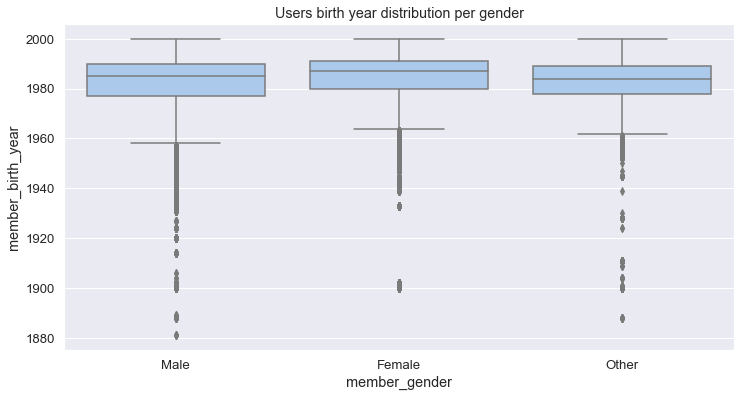

In [143]:
ax1 = sns.boxplot(data = df, x = 'member_gender', y = 'member_birth_year', color = base_color)
ax1.set_title('Users birth year distribution per gender');

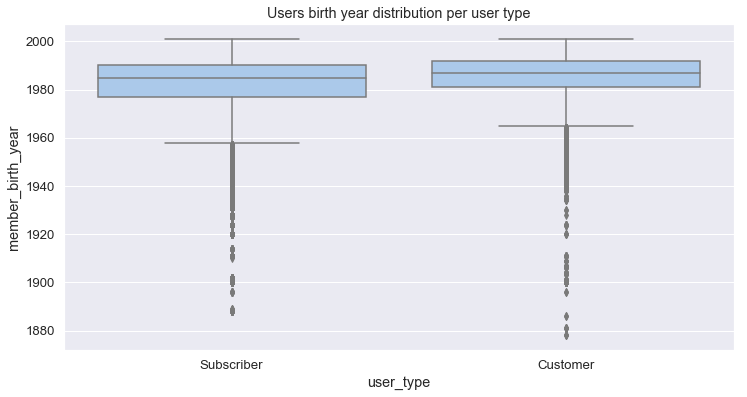

In [523]:
ax1 = sns.boxplot(data = df, x = 'user_type', y = 'member_birth_year', color = base_color)
ax1.set_title('Users birth year distribution per user type');

### 4.1 Members age by user type

In [144]:
member_clean.groupby('user_type')['age'].mean()

user_type
Customer      32.892337
Subscriber    35.105502
Name: age, dtype: float64

(12.7079033263769, 93.29209667362309)

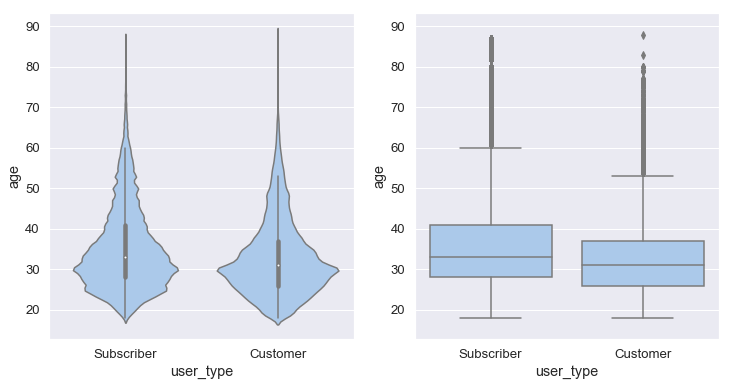

In [146]:
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = member_clean, x = 'user_type', y = 'age', color = base_color)

plt.subplot(1, 2, 2)
sns.boxplot(data = member_clean, x = 'user_type', y = 'age', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

#### Member age by gender

In [147]:
member_clean.groupby('member_gender')['age'].mean()

member_gender
Female    33.692008
Male      35.234363
Other     35.308752
Name: age, dtype: float64

(11.892348544395658, 94.10765145560434)

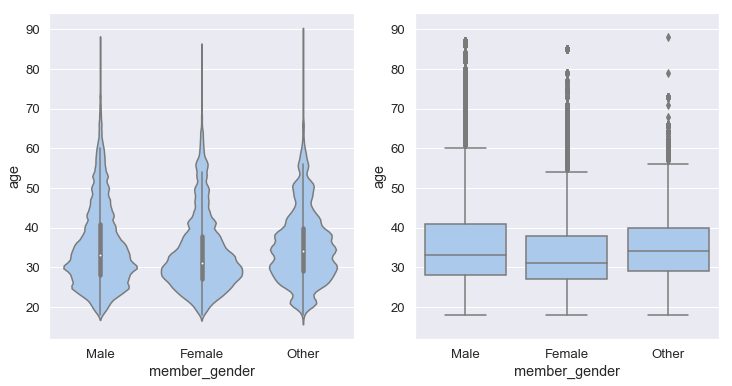

In [148]:
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = member_clean, x = 'member_gender', y = 'age', color = base_color)

plt.subplot(1, 2, 2)
sns.boxplot(data = member_clean, x = 'member_gender', y = 'age', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

### 4.2 Missings Analysis

In [149]:
rent_clean.isnull().sum()/rent_clean.shape[0]

rent_id                    0.0
bike_id                    0.0
bike_share_for_all_trip    0.0
duration_sec               0.0
start_station_id           0.0
start_time                 0.0
end_station_id             0.0
end_time                   0.0
year                       0.0
month                      0.0
hour                       0.0
dtype: float64

In [150]:
member_clean.isnull().sum()/member_clean.shape[0]

rent_id              0.000000
member_gender        0.059219
member_birth_year    0.060165
user_type            0.000000
age                  0.060165
dtype: float64

In [151]:
station_clean.isnull().sum()/station_clean.shape[0]

id           0.0
latitude     0.0
longitude    0.0
name         0.0
dtype: float64

In [153]:
rent_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 11 columns):
rent_id                    int64
bike_id                    int64
bike_share_for_all_trip    int64
duration_sec               int64
start_station_id           int64
start_time                 object
end_station_id             int64
end_time                   object
year                       int64
month                      int64
hour                       int64
dtypes: int64(9), object(2)
memory usage: 156.4+ MB


In [163]:
# preparing data for amount of rents over time
amount_of_rent = rent_clean[['start_time']].copy()
amount_of_rent['amount'] = 1
amount_of_rent['date'] = rent_clean['start_time'].dt.date

rent_timeseries = pd.DataFrame(amount_of_rent.groupby('date')['amount'].sum())

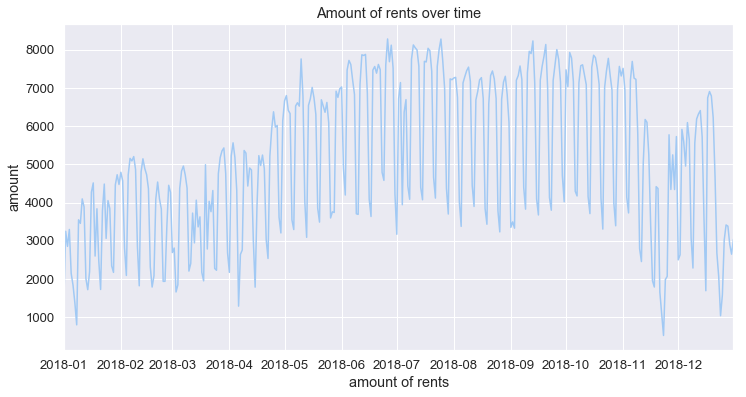

In [534]:
# visualize time series
ax = ax = sns.lineplot(x=rent_timeseries.index, y=rent_timeseries['amount'])
ax.set_xlim(rent_timeseries.index.min(), rent_timeseries.index.max())
ax.set_xlabel("amount of rents")
ax.set_title("Amount of rents over time")

fig = ax.get_figure()

In this diagram you can see the amount of rents per day in 2018. As you can see there were more users in the summer month (May to October), and less rents from November to April. The time serie is not smooth. This is because of daily changes and especially the change between weekdays and weekend days. If we would use a windowing function to average over 7 days, this time series would be more smooth. Also the different between weekdays and weekenddays could be worth a further investigation.

In [172]:
# preparing data for missings of variable over time
member_missings = member_clean.isnull()
member_missings['date'] = rent_clean['start_time'].dt.date

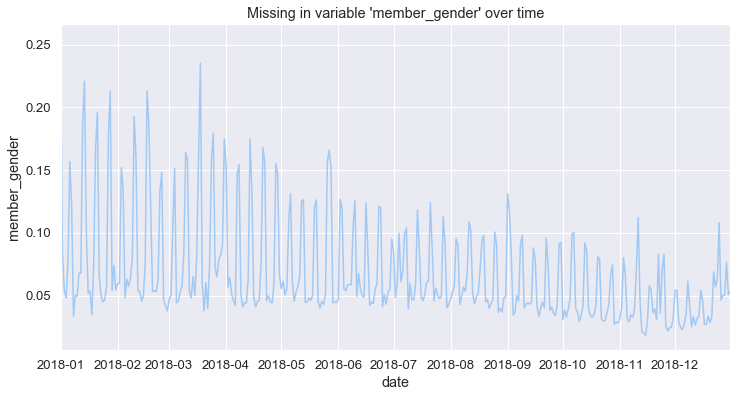

In [173]:
# time series for percental missings in variable: bike_share_for_all_trip
member_timeseries_missing = pd.DataFrame(member_missings.groupby('date')['member_gender'].mean())

# visualize time series
ax = ax = sns.lineplot(x=member_timeseries_missing.index, y=member_timeseries_missing['member_gender'])
ax.set_xlim(member_timeseries_missing.index.min(), member_timeseries_missing.index.max())
ax.set_title("Missing in variable 'member_gender' over time")

fig = ax.get_figure()

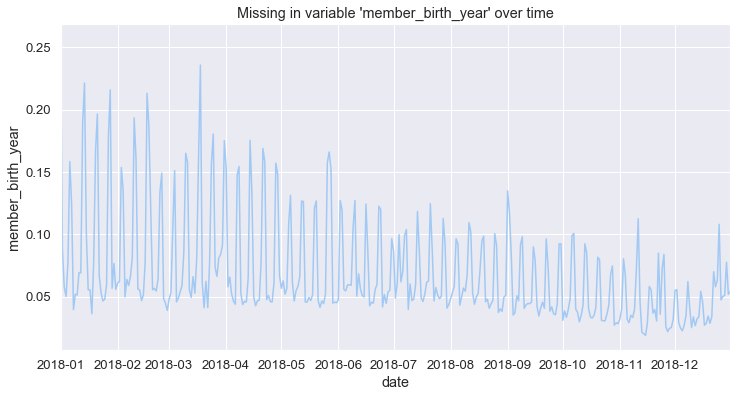

In [174]:
member_timeseries_missing = pd.DataFrame(member_missings.groupby('date')['member_birth_year'].mean())
# visualize time series
ax = ax = sns.lineplot(x=member_timeseries_missing.index, y=member_timeseries_missing['member_birth_year'])
ax.set_xlim(member_timeseries_missing.index.min(), member_timeseries_missing.index.max())
ax.set_title("Missing in variable 'member_birth_year' over time")

fig = ax.get_figure()

As we can see, the missings of member birth and year over time per day (in % of amount of rents per day) became less over the year. One assumption is, that the users that are no subscribers (user type == customer) don't need to save their birth year and gender. This could be investigated further.

In [181]:
member_clean['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [224]:
where_type_is_subscriber = member_clean['user_type'] == 'Subscriber'
where_type_is_customer = member_clean['user_type'] == 'Customer'


# compute relative values of missings, relative to amount of its user types
member_missings_subscriber = member_missings.copy()
member_missings_customer = member_missings.copy()

member_missings_subscriber['member_birth_year'] = member_missings['member_birth_year'] / (member_missings[where_type_is_subscriber].shape[0]) * 365
member_missings_customer['member_birth_year'] = member_missings['member_birth_year'] / (member_missings[where_type_is_customer].shape[0]) * 365
member_missings_subscriber['member_gender'] = member_missings['member_gender'] / member_missings[where_type_is_subscriber].shape[0]
member_missings_customer['member_gender'] = member_missings['member_gender'] / member_missings[where_type_is_customer].shape[0]

# initialize only rents of user type dataframes
#user_type_subscriber_ts = pd.DataFrame(member_missings_subscriber[where_type_is_subscriber].groupby('date')['member_birth_year'].mean())
#user_type_customer_ts = pd.DataFrame(member_missings_customer[where_type_is_customer].groupby('date')['member_birth_year'].mean())

# add columns back to member_missing df
member_missings_customer['member_birth_year_type'] = member_missings_subscriber['member_birth_year']
member_missings_customer['member_gender_type'] = member_missings_subscriber['member_gender']
member_missings_customer['member_birth_type'] = member_missings_customer['member_birth_year']
member_missings_customer['member_gender_type'] = member_missings_customer['member_gender']
member_missings_customer['user_type'] = member_clean['user_type']

In [225]:
member_missings_customer['user_type'].unique()

array(['Subscriber', 'Customer'], dtype=object)

In [226]:
member_missings.shape[0]

1863721

In [227]:
print(user_type_subscriber_ts['member_birth_year'].shape[0])
print(user_type_customer_ts['member_birth_year'].shape[0])

365
365


(730, 2)


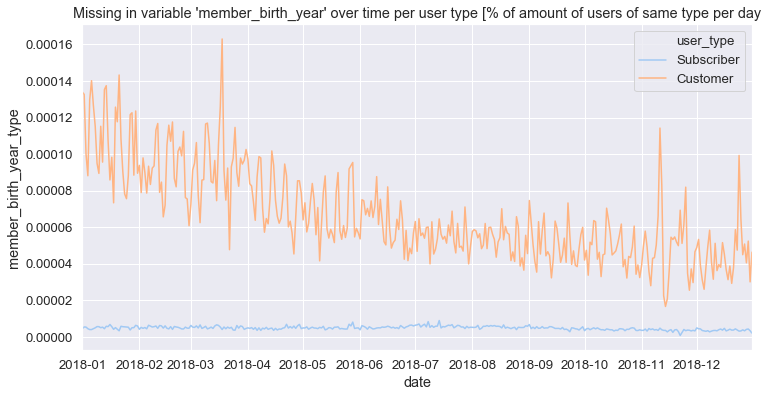

In [235]:
user_type_ts_subscriber = pd.DataFrame(member_missings_customer[where_type_is_subscriber].groupby('date')['member_birth_year_type'].mean())
user_type_ts_subscriber['user_type'] = 'Subscriber'
user_type_ts_customer = pd.DataFrame(member_missings_customer[where_type_is_customer].groupby('date')['member_birth_year_type'].mean())
user_type_ts_customer['user_type'] = 'Customer'

user_type_ts = user_type_ts_subscriber.append(user_type_ts_customer, ignore_index=False)
print(user_type_ts.shape)

# visualize time series
ax = ax = sns.lineplot(x=user_type_ts.index, y=user_type_ts['member_birth_year_type'], hue=user_type_ts['user_type'])
#ax2 = ax2 = sns.lineplot(x=user_type_customer_ts.index, y=user_type_customer_ts['member_birth_year'])

ax.set_xlim(user_type_ts.index.min(), user_type_ts.index.max())
ax.set_title("Missing in variable 'member_birth_year' over time per user type [% of amount of users of same type per day")

fig = ax.get_figure()

(730, 2)


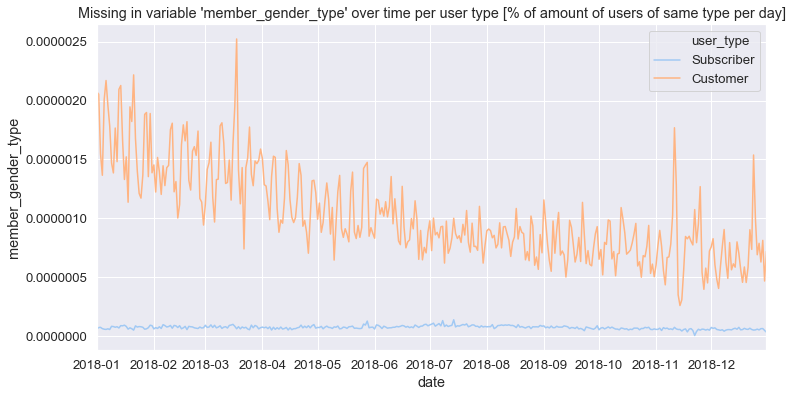

In [230]:
user_type_ts_subscriber = pd.DataFrame(member_missings_customer[where_type_is_subscriber].groupby('date')['member_gender_type'].mean())
user_type_ts_subscriber['user_type'] = 'Subscriber'
user_type_ts_customer = pd.DataFrame(member_missings_customer[where_type_is_customer].groupby('date')['member_gender_type'].mean())
user_type_ts_customer['user_type'] = 'Customer'

user_type_ts = user_type_ts_subscriber.append(user_type_ts_customer, ignore_index=False)
print(user_type_ts.shape)

# visualize time series
ax = ax = sns.lineplot(x=user_type_ts.index, y=user_type_ts['member_gender_type'], hue=user_type_ts['user_type'])
#ax2 = ax2 = sns.lineplot(x=user_type_customer_ts.index, y=user_type_customer_ts['member_birth_year'])

ax.set_xlim(user_type_ts.index.min(), user_type_ts.index.max())
ax.set_title("Missing in variable 'member_gender_type' over time per user type [% of amount of users of same type per day]")

fig = ax.get_figure()

In above two diagrams you can see the percental amount of missings in the variable birth year and gender seperated by user type. It is computed percential of the amount of rents per day of each user type. As you can see there are much more missing birth years and gender in customer user rents than in subscriber rents. But there are still missings in the subsriber rents. So it is not a must-have variable for 

### 4.3 Rush hours and month

In [549]:
list(rent_clean)

['rent_id',
 'bike_id',
 'bike_share_for_all_trip',
 'duration_sec',
 'start_station_id',
 'start_time',
 'end_station_id',
 'end_time',
 'year',
 'month',
 'hour']

In [553]:
# new feature 'amount' into station_clean
amount_of_rent = rent_clean[['start_time']].copy()
amount_of_rent['amount'] = 1
amount_of_rent['hour'] = rent_clean['start_time'].dt.hour

rent_timeseries = pd.DataFrame(amount_of_rent.groupby('hour')['amount'].sum())

In [561]:
amount_of_rent['amount'].min(), amount_of_rent['amount'].max()

(1, 1)

In [554]:
list(station_clean)

['id', 'latitude', 'longitude', 'name', 'cluster_id']

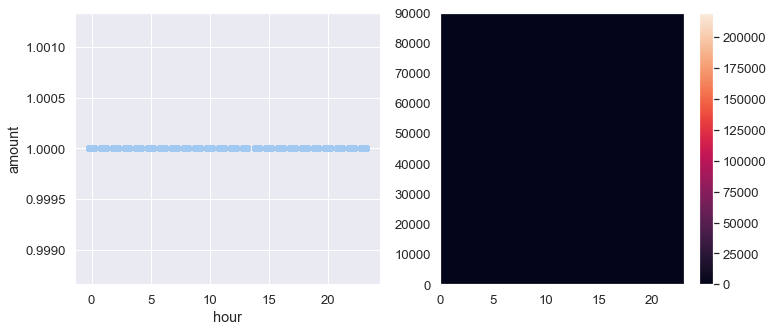

In [560]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sns.regplot( x = amount_of_rent['hour'], y = amount_of_rent['amount'], fit_reg = False,
            x_jitter = 0.2, scatter_kws = {'alpha' : 0.3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_y = np.arange(0, 30000, 1)
bins_x = np.arange(0, 24, 1)
plt.hist2d(x = amount_of_rent['hour'], y = amount_of_rent['amount'],
           bins = [bins_x, bins_y])
plt.colorbar();

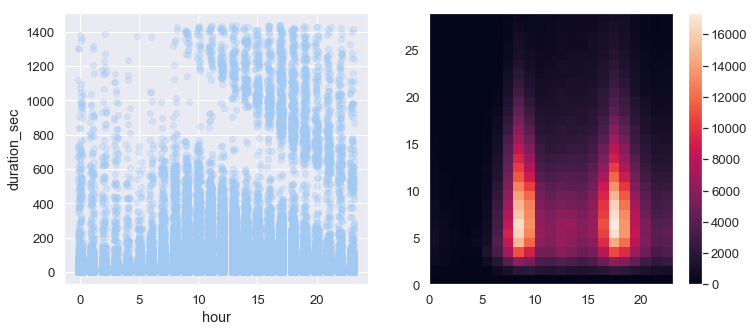

In [544]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sns.regplot( x = rent_clean['hour'], y = rent_clean['duration_sec']/60, fit_reg = False,
            x_jitter = 0.2, scatter_kws = {'alpha' : 0.3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_y = np.arange(0, 30, 1)
bins_x = np.arange(0, 24, 1)
plt.hist2d(x = rent_clean['hour'], y = rent_clean['duration_sec']/60,
           bins = [bins_x, bins_y])
plt.colorbar();

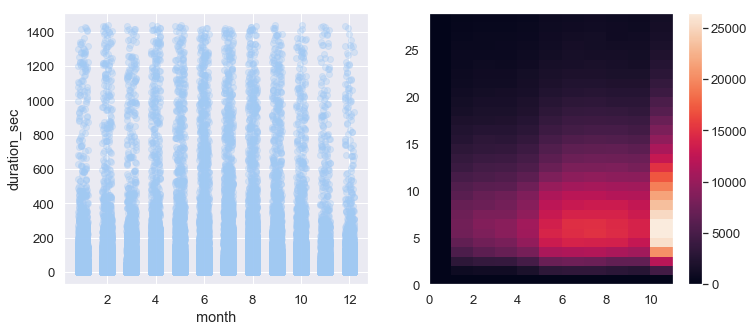

In [545]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sns.regplot( x = rent_clean['month'], y = rent_clean['duration_sec']/60, fit_reg = False,
            x_jitter = 0.2, scatter_kws = {'alpha' : 0.3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_y = np.arange(0, 30, 1) # show only 0-30min
bins_x = np.arange(0, 12, 1)
plt.hist2d(x = rent_clean['month'], y = rent_clean['duration_sec']/60,
           bins = [bins_x, bins_y])
plt.colorbar();

### 4.4 Location and rush of rent stations

Where are those rent stations located? And how busy are those rent stations? Where are the busiest rent stations?

Preparing: Feature development

- add new feature 'amount' to stations (the amount of rents in that station in year 2018).

In [240]:
# preparing rush on stations
rush_df = rent_clean.copy()
rush_df['amount'] = 1

station_rush_start = pd.DataFrame(rush_df.groupby('start_station_id')['amount'].sum())
station_rush_end = pd.DataFrame(rush_df.groupby('end_station_id')['amount'].sum())
print('amount start stations: ', station_rush_start.shape[0])
print('amount end stations: ', station_rush_end.shape[0])

station_rush_end.index.names = ['start_station_id']

rush = station_rush_start # .append(pd.DataFrame(station_rush_end))

print('BEFORE merging start and end ids: ', rush.shape)

for i, row in pd.DataFrame(station_rush_end).iterrows():
    if i in list(rush.index):
        rush.loc[i, 'amount'] += row['amount']
    else:
        rush = rush.append(row)
        
print('AFTER merging start and end ids: ', rush.shape)

amount start stations:  331
amount end stations:  331
BEFORE merging start and end ids:  (331, 1)
AFTER merging start and end ids:  (331, 1)


Before and after merging start and end stations, there are still 331 stations. This means, all stations are used as start and end stations.

In [243]:
rush.head()

,amount
start_station_id,
3,64742
4,12099
5,51009
6,72612
7,17224


In [247]:
# copy the amount of stations (in rush df) to a full station data frame
rush_stations = station_clean.copy()
rush_stations['amount'] = 0

for i, row in rush_stations.iterrows():
    station_id = row['id']
    if station_id in list(rush.index.values):
        amount = rush['amount'][station_id]
        rush_stations.loc[i, 'amount'] = amount

In [393]:
# converting data type to int
rush_stations['id'] = rush_stations['id'].astype(int)

Stations dataframe with new feature `amount`

In [394]:
rush_stations.head()

,id,latitude,longitude,name,amount,log_amount
0,284,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,22990,4.361539
1,6,37.804770,-122.403234,The Embarcadero at Sansome St,72612,4.861008
2,93,37.770407,-122.391198,4th St at Mission Bay Blvd S,37363,4.572442
3,308,37.336802,-121.894090,San Pedro Square,6053,3.781971
4,312,37.329732,-121.901782,San Jose Diridon Station,11588,4.064008


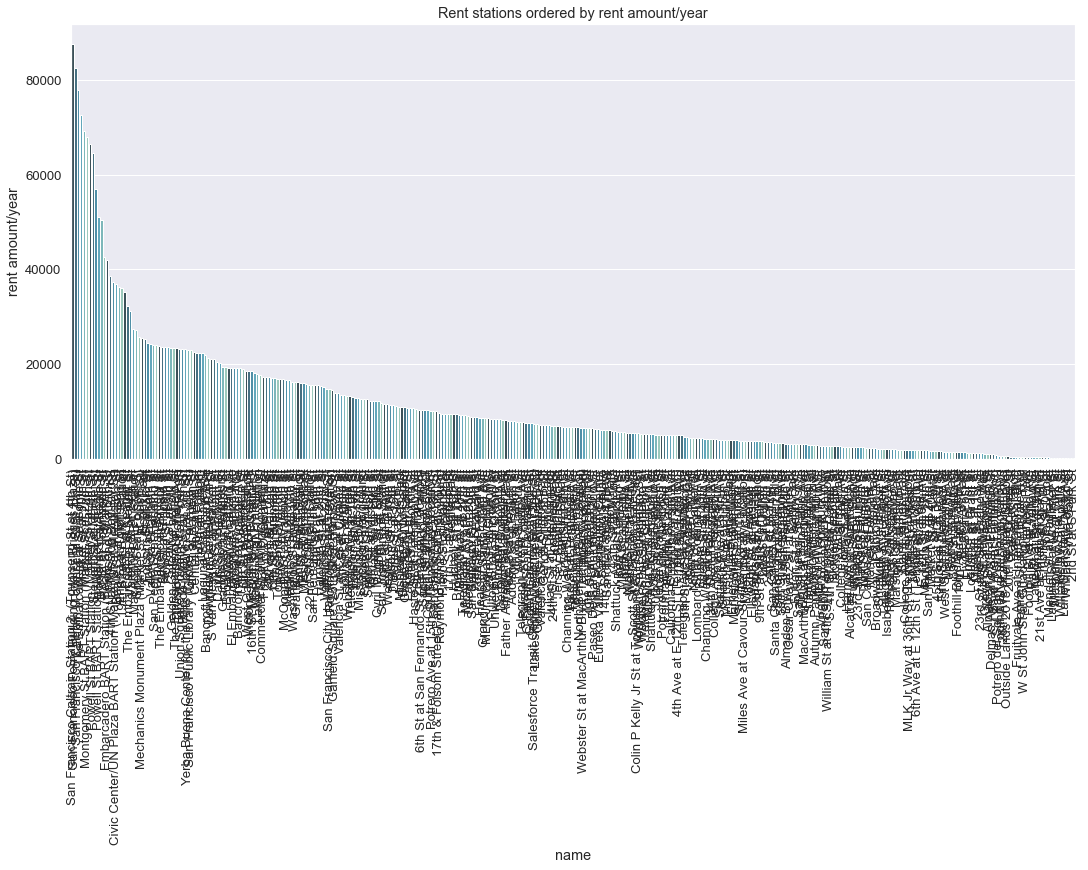

In [541]:
result = rush_stations.groupby(["name"])['amount'].aggregate(np.median).reset_index().sort_values('amount')
fig, ax = fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
ax = sns.barplot(x='name', y="amount", data=rush_stations, order=result['name'].iloc[::-1], palette=sns.color_palette("GnBu_d"))
ax.set_ylabel('rent amount/year')
plt.title('Rent stations ordered by rent amount/year')
plt.xticks(rotation=90);

In the above diagram we can see the stations ordered by their amount of rents in year 2018. So the busiest station is on the left. The station with lowest rents on the right. But so far, we can't read the station'name at the x-axis. This is why we need to scale the view to the x-axis. Let's have a look to just the 40 busiest stations.

In [536]:
result.shape

(348, 2)

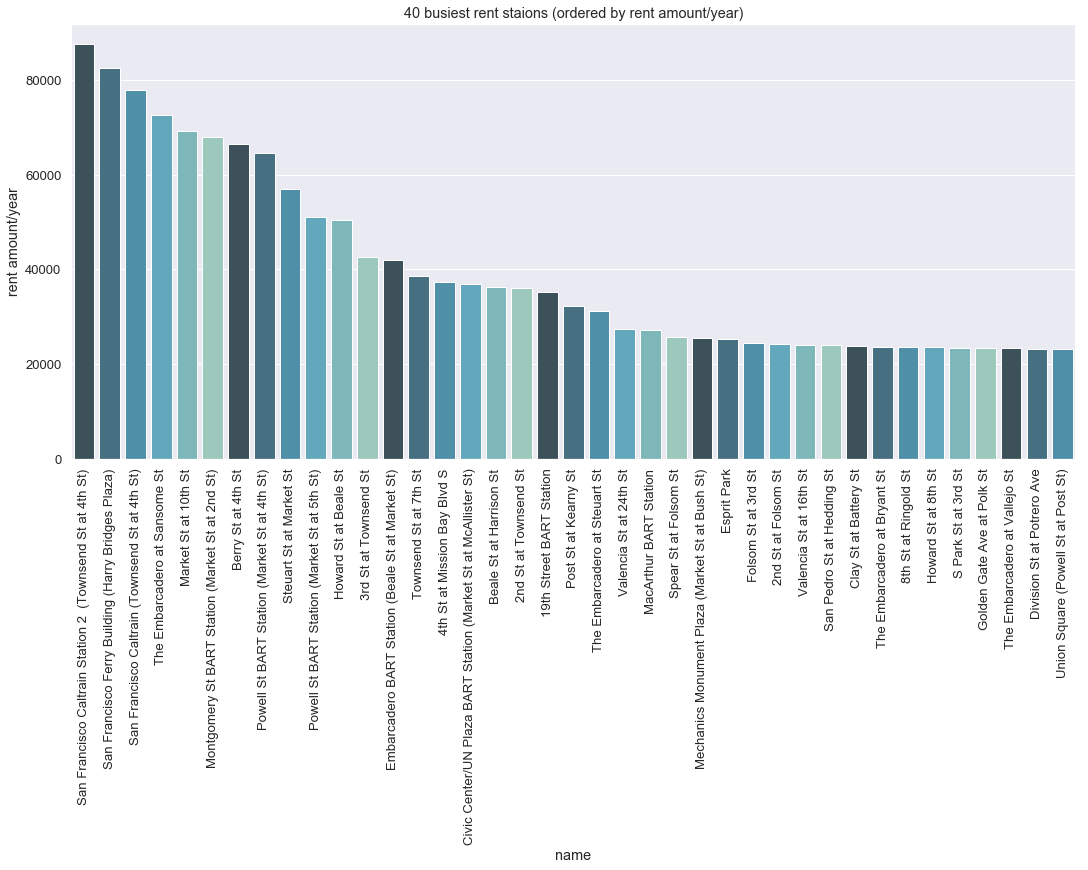

In [543]:
# show only left 40 bussyiest stations
fig, ax = fig, ax = plt.subplots()
fig.set_size_inches(18, 8)
ax = sns.barplot(x='name', y="amount", data=rush_stations, order=result['name'].iloc[:308:-1], palette=sns.color_palette("GnBu_d"))
ax.set_ylabel('rent amount/year')
plt.title('40 busiest rent staions (ordered by rent amount/year)')
plt.xticks(rotation=90);

In the above visualization, we can see that the station with name `San FranciscoCaltrain Station 2 (Townsened St at 4th St)` is the station with the most rents in year 2018. There are about 10-20 more busier stations with decreasing amount of rents. All other stations are less busy and had more or less the same amount of rents in the year 2018 (about 20000 rents/year).

Text(0.5, 1.0, 'Multivariate scatterplot of rating and favorite count over time')

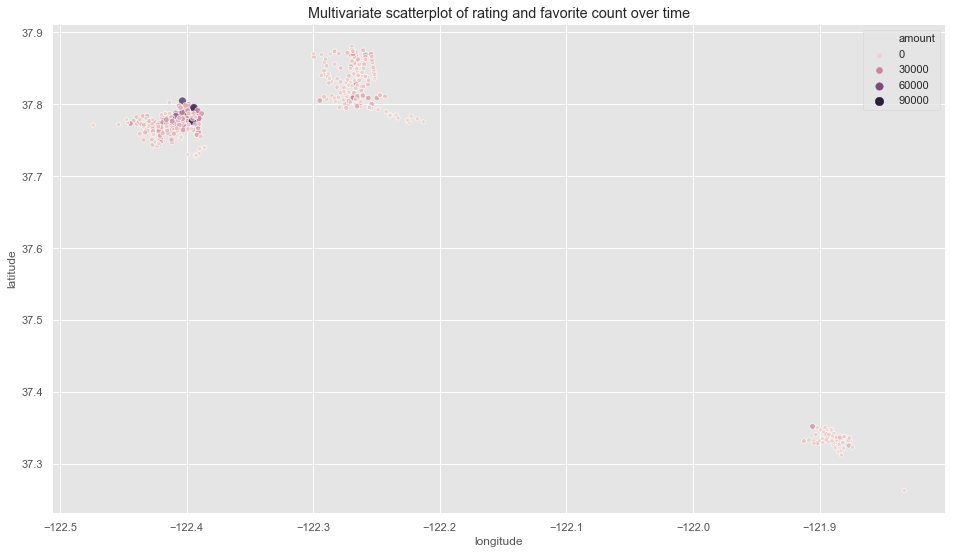

In [327]:
ax = sns.scatterplot(x="longitude", y="latitude",
                      hue="amount", size="amount",alpha=.8,
                      data=rush_stations)
#ax.set_ylim(rush_stations['latitude'].min(), rush_stations['latitude'].max())
ax.set_title("Multivariate scatterplot of rating and favorite count over time")

#### Rent stations in map

See example from: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

In [311]:
list(member_clean)

['rent_id', 'member_gender', 'member_birth_year', 'user_type', 'age']

In [266]:
# Extract the data we're interested in
lat = rush_stations['latitude'].values
lon = rush_stations['longitude'].values
amount = rush_stations['amount'].values
#area = cities['area_total_km2'].values


In [267]:
print('latitude range:', rush_stations['latitude'].min(), rush_stations['latitude'].max())
print('longitude range: ',rush_stations['longitude'].min(), rush_stations['longitude'].max())

print('latitude mean:', rush_stations['latitude'].mean())
print('longitude mean: ',rush_stations['longitude'].mean())


mean_latitude = rush_stations['latitude'].mean()
mean_longitude = rush_stations['longitude'].mean()
diff_latitude = rush_stations['latitude'].max() - rush_stations['latitude'].min()
diff_longitude =  rush_stations['longitude'].max() - rush_stations['longitude'].min()

print(mean_latitude, mean_longitude)
print(diff_latitude, diff_longitude)

latitude range: 37.26331 37.88022244590679
longitude range:  -122.473658 -121.83333200000001
latitude mean: 37.73065393097607
longitude mean:  -122.27529277694882
37.73065393097607 -122.27529277694882
0.6169124459067916 0.6403259999999875


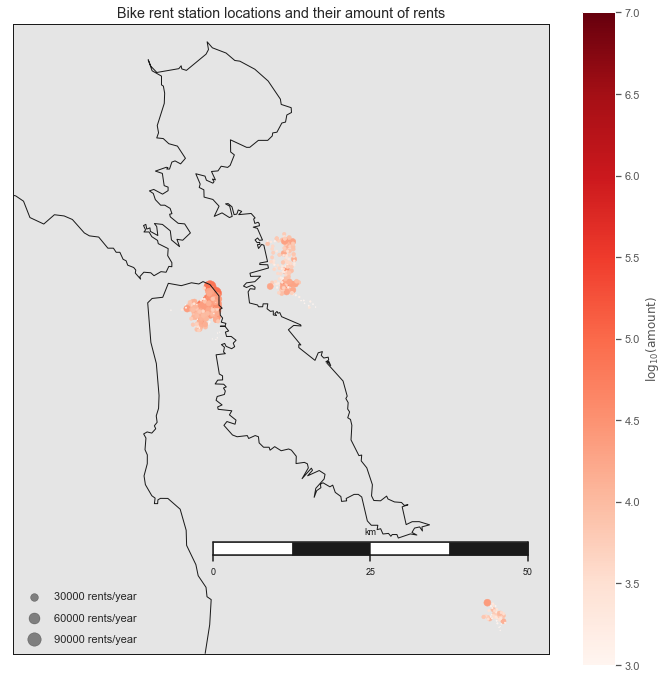

In [457]:
# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='tmerc', resolution='h', 
            lat_0=mean_latitude, lon_0=mean_longitude,
            width=0.085E6, height=0.1E6)
#m.shadedrelief()
m.drawcoastlines()
m.drawcountries(color='gray')
#m.fillcontinents(color="#cc9955", lake_color="aqua")
m.drawmapboundary()
#m.drawrivers()
#m.drawstates(color='gray')

m.drawmapscale(lon=mean_longitude+0.16, lat=mean_latitude-0.3, lon0=mean_longitude, lat0=mean_latitude, length=50, barstyle='fancy')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(amount), s=amount/500,
          cmap='Reds', alpha=1)
#plt.scatter(lon, lat, 10, marker='o', color='red')

#x, y = m(lon, lat) # transform coordinates
#plt.scatter(x,y,10, marker='o', color='red')


plt.title('Bike rent station locations and their amount of rents');
#plt.show()

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm amount})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [30000, 60000, 90000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a/500,
                label=str(a) + ' rents/year')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

When we plot the station locations into a map, we see that there are three main parts (clusters), where the stations are located. It seems that the rent service has stations in three different cities. Let's try to find out, where the center of those 3 station clusters are. So that we can name them by their city name in an additional feature.

#### Cluster the 3 location
Use k-means algorithm from:  https://mubaris.com/posts/kmeans-clustering/

In [430]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


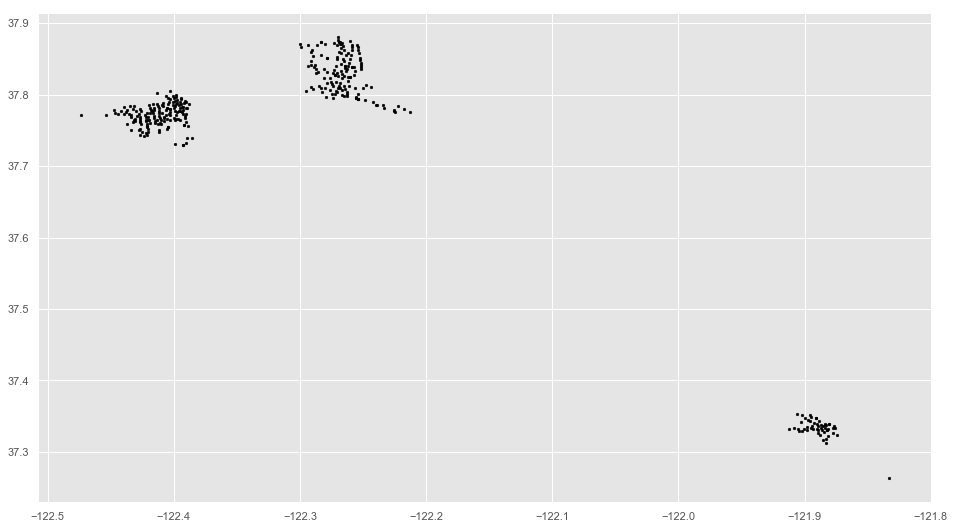

In [431]:
# Getting the values and plotting it
f1 = rush_stations['latitude'].values
f2 = rush_stations['longitude'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f2, f1, c='black', s=7);


In [432]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


In [433]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.array([37.4, 37.7, 37.9])
# Y coordinates of random centroids
C_y = np.array([-122.0, -122.4, -122.2])
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)


[[  37.4 -122. ]
 [  37.7 -122.4]
 [  37.9 -122.2]]


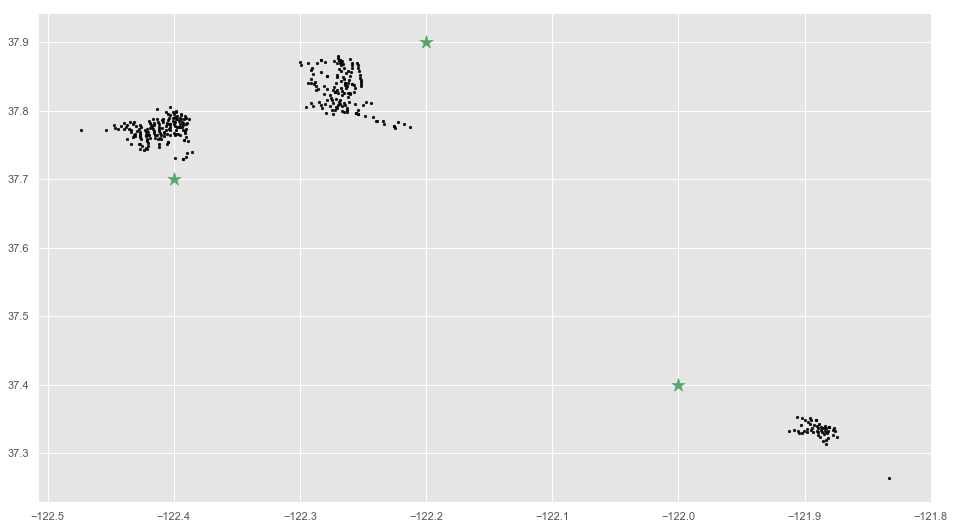

In [434]:
# Plotting along with the Centroids
plt.scatter(f2, f1, c='#050505', s=7)
plt.scatter(C_y, C_x, marker='*', s=200, c='g')

In [435]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)



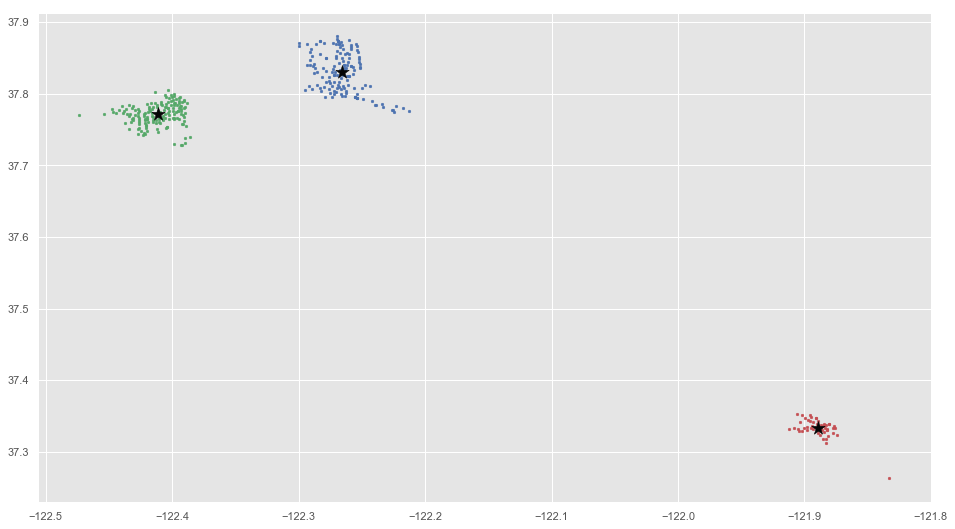

In [436]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 1], points[:, 0], s=7, c=colors[i])
ax.scatter(C[:, 1], C[:, 0], marker='*', s=200, c='#050505');

In [437]:
C

array([[  37.333435, -121.88909 ],
       [  37.771667, -122.411606],
       [  37.830585, -122.26604 ]], dtype=float32)

There were three city centers found: 'San_Jose', 'San_Francisco', 'East_Bay.

#### Bike rent stations in San José

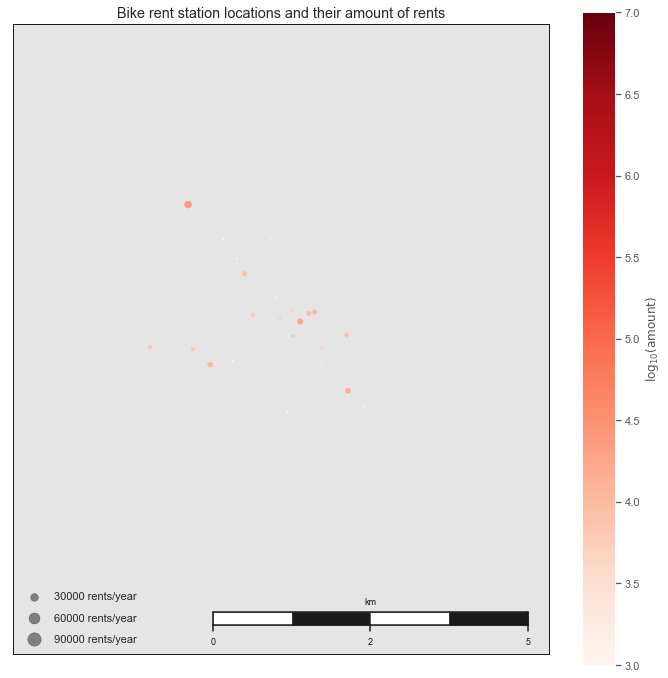

In [454]:
# draw map for first cluster center
center = C[0]

# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='tmerc', resolution='h', 
            lat_0=center[0], lon_0=center[1],
            width=0.0085E6, height=0.01E6)
#m.shadedrelief()
m.drawcoastlines()
m.drawcountries(color='gray')
#m.fillcontinents(color="#cc9955", lake_color="aqua")
m.drawmapboundary()
#m.drawrivers()
#m.drawstates(color='gray')

m.drawmapscale(lon=center[1]+0.016, lat=center[0]-0.04, 
               lon0=center[1], lat0=center[0], length=5, barstyle='fancy')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(amount), s=amount/500,
          cmap='Reds', alpha=1)
#plt.scatter(lon, lat, 10, marker='o', color='red')

#x, y = m(lon, lat) # transform coordinates
#plt.scatter(x,y,10, marker='o', color='red')


plt.title('Bike rent station locations and their amount of rents');
#plt.show()

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm amount})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [30000, 60000, 90000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a/500,
                label=str(a) + ' rents/year')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

#### Bike rent stations in San Francisco

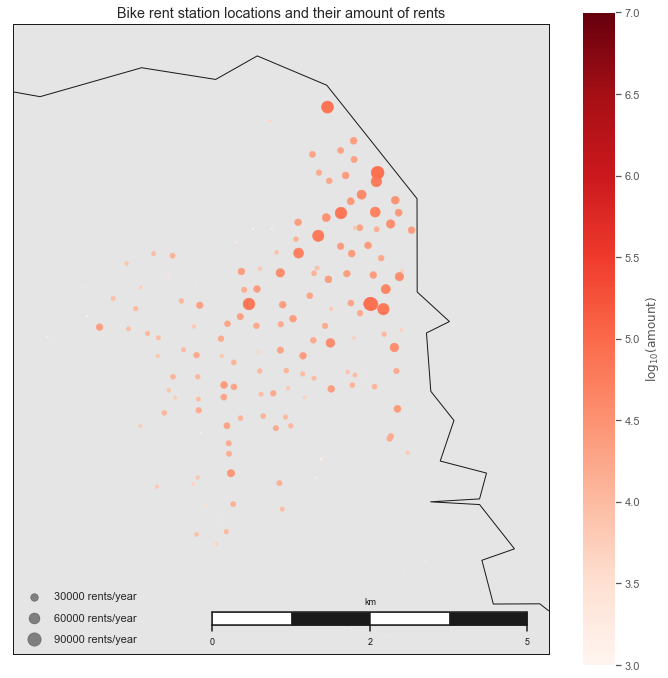

In [455]:
# draw map for first cluster center
center = C[1]

# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='tmerc', resolution='h', 
            lat_0=center[0], lon_0=center[1],
            width=0.0085E6, height=0.01E6)
#m.shadedrelief()
m.drawcoastlines()
m.drawcountries(color='gray')
#m.fillcontinents(color="#cc9955", lake_color="aqua")
m.drawmapboundary()
#m.drawrivers()
#m.drawstates(color='gray')

m.drawmapscale(lon=center[1]+0.016, lat=center[0]-0.04, 
               lon0=center[1], lat0=center[0], length=5, barstyle='fancy')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(amount), s=amount/500,
          cmap='Reds', alpha=1)
#plt.scatter(lon, lat, 10, marker='o', color='red')

#x, y = m(lon, lat) # transform coordinates
#plt.scatter(x,y,10, marker='o', color='red')


plt.title('Bike rent station locations and their amount of rents');
#plt.show()

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm amount})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [30000, 60000, 90000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a/500,
                label=str(a) + ' rents/year')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

#### Bike rent stations in East Bay

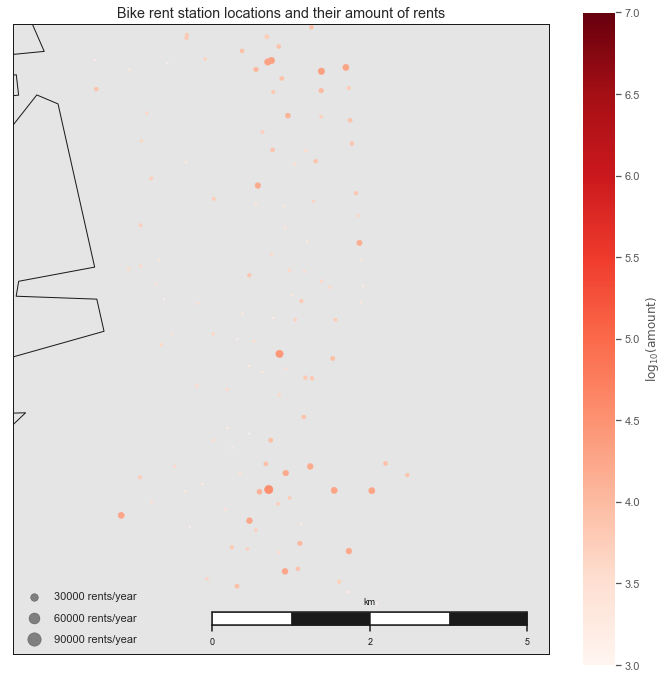

In [456]:
# draw map for first cluster center
center = C[2]

# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='tmerc', resolution='h', 
            lat_0=center[0], lon_0=center[1],
            width=0.0085E6, height=0.01E6)
#m.shadedrelief()
m.drawcoastlines()
m.drawcountries(color='gray')
#m.fillcontinents(color="#cc9955", lake_color="aqua")
m.drawmapboundary()
#m.drawrivers()
#m.drawstates(color='gray')

m.drawmapscale(lon=center[1]+0.016, lat=center[0]-0.04, 
               lon0=center[1], lat0=center[0], length=5, barstyle='fancy')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(amount), s=amount/500,
          cmap='Reds', alpha=1)
#plt.scatter(lon, lat, 10, marker='o', color='red')

#x, y = m(lon, lat) # transform coordinates
#plt.scatter(x,y,10, marker='o', color='red')


plt.title('Bike rent station locations and their amount of rents');
#plt.show()

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm amount})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [30000, 60000, 90000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a/500,
                label=str(a) + ' rents/year')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

#### New feature: Cluster ID

In [458]:
clustered_stations = pd.DataFrame()
clustered_stations['latitude'] = pd.Series(X[:,0])
clustered_stations['longitude'] = pd.Series(X[:,1])
clustered_stations['cluster_id'] = pd.Series(clusters).astype(int)
clustered_stations.shape

(358, 3)

In [459]:
# new feature
station_clean['cluster_id'] = pd.Series(clusters)
station_clean['cluster_id'].value_counts()

1.0    160
2.0    145
0.0     53
Name: cluster_id, dtype: int64

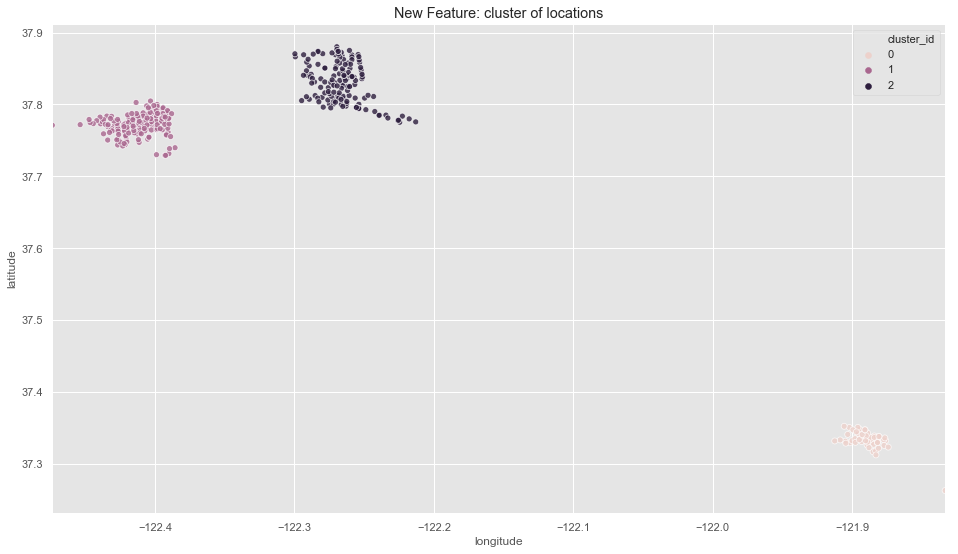

In [461]:
ax = sns.scatterplot(x="longitude", y="latitude",
                      hue="cluster_id", hue_order=[0.0,1.0,2.0], alpha=.8,
                      data=clustered_stations)
ax.set_xlim(rush_stations['longitude'].min(), rush_stations['longitude'].max())
ax.set_title("New Feature: cluster of locations");

In [462]:
clustered_stations['cluster_id'] = clustered_stations['cluster_id'].replace({0: 'San_Jose', 1: 'San_Francisco', 2: 'East_Bay'})

In [463]:
clustered_stations['cluster_id'].value_counts()

San_Francisco    160
East_Bay         145
San_Jose          53
Name: cluster_id, dtype: int64

#### New feature: cluster id in rent table

In [464]:
# get id from older station_clean dataframe
# new dataframe with latitude and longitude as dictionaries
#lookupStation = [{'latitude': row['latitude'], 'longitude': row['longitude']} for i, row in station_clean.iterrows()]

for i, row in clustered_stations.iterrows():
    # extract location
    latitude_tmp = row['latitude']
    longitude_tmp = row['longitude']
    
    # search for the same station with the longitude and latitude information in the older dataframe
    station_id_frame = station_clean.query('latitude==@latitude_tmp & longitude==@longitude_tmp')
    start_station_id = station_id_frame['id'].iloc[0]
    
    # write the found station id and name to replace missings in the rent_clean dataframe
    clustered_stations.loc[i, 'id'] = start_station_id
    

In [465]:
list(clustered_stations)

['latitude', 'longitude', 'cluster_id', 'id']

In [466]:
rent_clean.shape

(1863721, 11)

A subset of the rent data is used due to computation time limit

In [467]:
rent_short = rush_stations[:1000]
list(rent_short) 

['id', 'latitude', 'longitude', 'name', 'amount', 'log_amount']

Text(0.5, 1.0, 'Multivariate scatterplot of rating and favorite count over time')

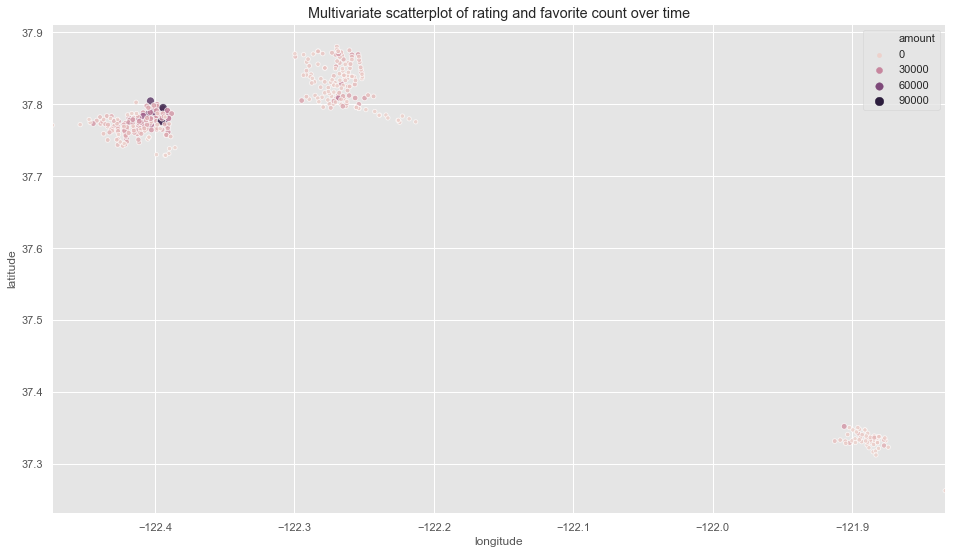

In [469]:
ax = sns.scatterplot(x="longitude", y="latitude",
                      hue="amount", size="amount",alpha=.8,
                      data=rent_short)
ax.set_xlim(rush_stations['longitude'].min(), rush_stations['longitude'].max())
ax.set_title("Multivariate scatterplot of rating and favorite count over time")

Shorter dataframe is still good distributed over all clusters.

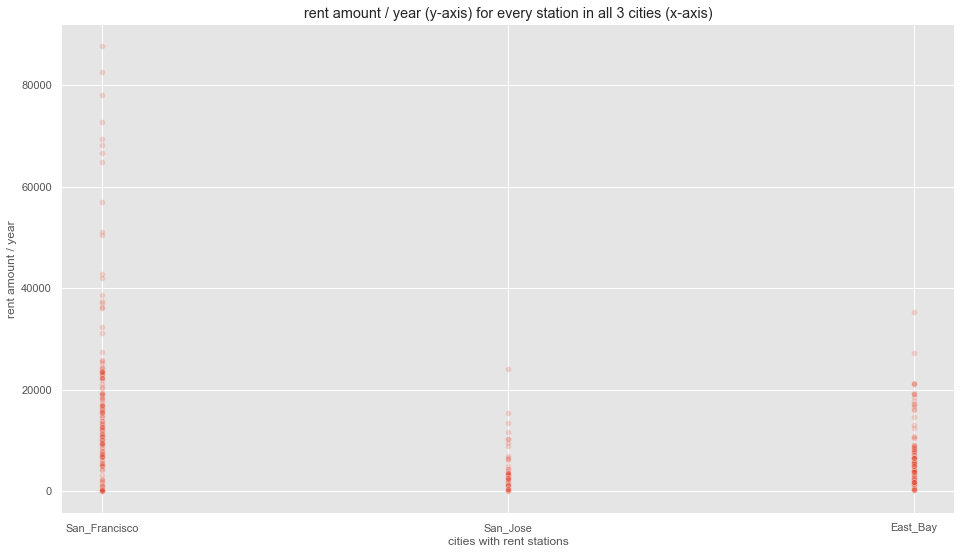

In [497]:
ax = sns.scatterplot( x = rent_short['cluster_id'], y = rent_short['amount'],
            x_jitter = 0.2, alpha=0.2);
ax.set_xlabel('cities with rent stations')
ax.set_ylabel('rent amount / year')

ax.set_title('rent amount / year (y-axis) for every station in all 3 cities (x-axis)');

For every city all stations were plotted with their yearly rent amount.

In [498]:
clustered_stations.shape

(358, 4)

In [499]:
rent_short.head()

,id,latitude,longitude,name,amount,log_amount,cluster_id
0,284,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,22990,4.361539,San_Francisco
1,6,37.804770,-122.403234,The Embarcadero at Sansome St,72612,4.861008,San_Francisco
2,93,37.770407,-122.391198,4th St at Mission Bay Blvd S,37363,4.572442,San_Francisco
3,308,37.336802,-121.894090,San Pedro Square,6053,3.781971,San_Jose
4,312,37.329732,-121.901782,San Jose Diridon Station,11588,4.064008,San_Jose


In [500]:
clustered_stations.head()

,latitude,longitude,cluster_id,id
0,37.784872,-122.400876,San_Francisco,284.0
1,37.804770,-122.403234,San_Francisco,6.0
2,37.770407,-122.391198,San_Francisco,93.0
3,37.336802,-121.894090,San_Jose,308.0
4,37.329732,-121.901782,San_Jose,312.0


In [522]:
list(rent_copy)

['rent_id',
 'bike_id',
 'bike_share_for_all_trip',
 'duration_sec',
 'start_station_id',
 'start_time',
 'end_station_id',
 'end_time',
 'year',
 'month',
 'hour',
 'cluster_id']

Sampling data from all of the year 2018, to reduce data amount and computation time.

In [524]:
rent_clean.shape

(1863721, 11)

In [525]:
rent_sample = rent_clean.sample(10000)

In [526]:
# bring cluster id into rent_clean dataframe
rent_sample['cluster_id'] = -1

for i, row in rent_sample.iterrows():
    # lookup table - look up the cluster id of the given station id and write to rent table
    station_id = row['start_station_id']
    frame = clustered_stations.query('id == @station_id')
    cluster_id = frame['cluster_id'].iloc[0]
    # write to short rent table
    rent_sample.loc[i, 'cluster_id'] = cluster_id
    

In [530]:
list(clustered_stations)

['latitude', 'longitude', 'cluster_id', 'id']

In [529]:
list(rent_sample)

['rent_id',
 'bike_id',
 'bike_share_for_all_trip',
 'duration_sec',
 'start_station_id',
 'start_time',
 'end_station_id',
 'end_time',
 'year',
 'month',
 'hour',
 'cluster_id']

In [528]:
# assign data two two groups of business (depending on amount)
rent_sample.loc[:,'busy'] = rent_sample['amount'] > 40000
list(rent_sample)

KeyError: 'amount'

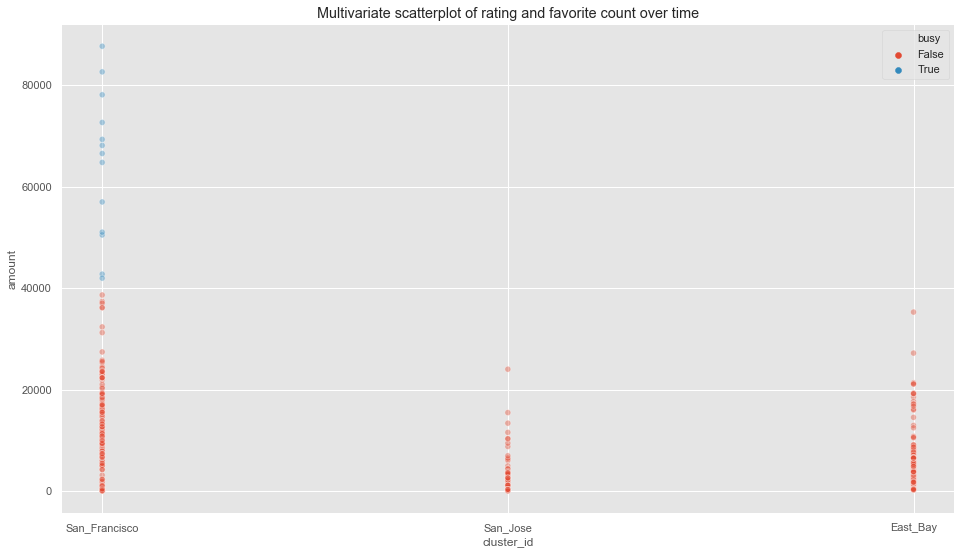

In [504]:
ax = sns.scatterplot(x="cluster_id", y="amount",x_jitter = True,
                      hue="busy", alpha=.4, 
                      data=rent_short)
ax.set_title("Multivariate scatterplot of rating and favorite count over time");

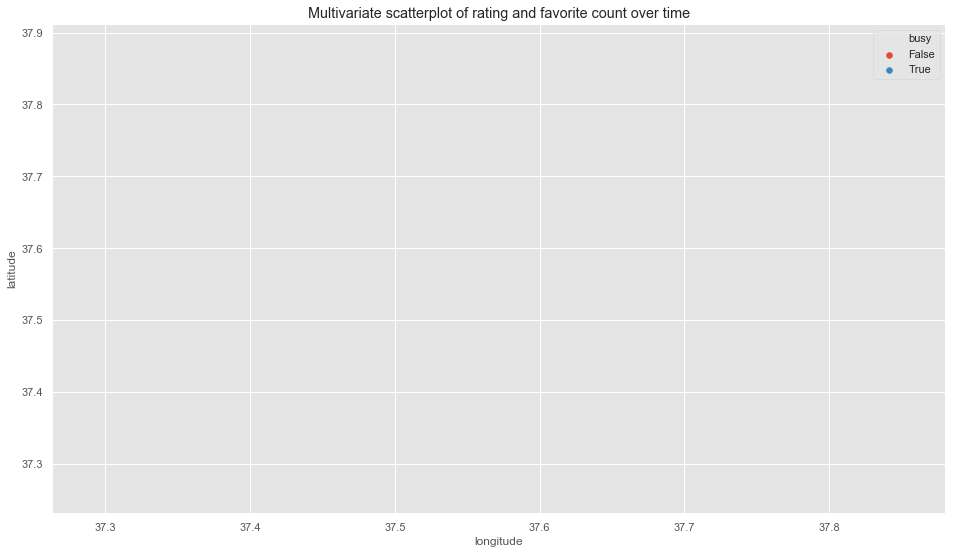

In [506]:
ax = sns.scatterplot(x="longitude", y="latitude", 
                      hue="busy",alpha=.4,
                      data=rent_short)
ax.set_xlim(rush_stations['latitude'].min(), rush_stations['latitude'].max())
ax.set_title("Multivariate scatterplot of rating and favorite count over time");

### 4.5 Member differences in different cities

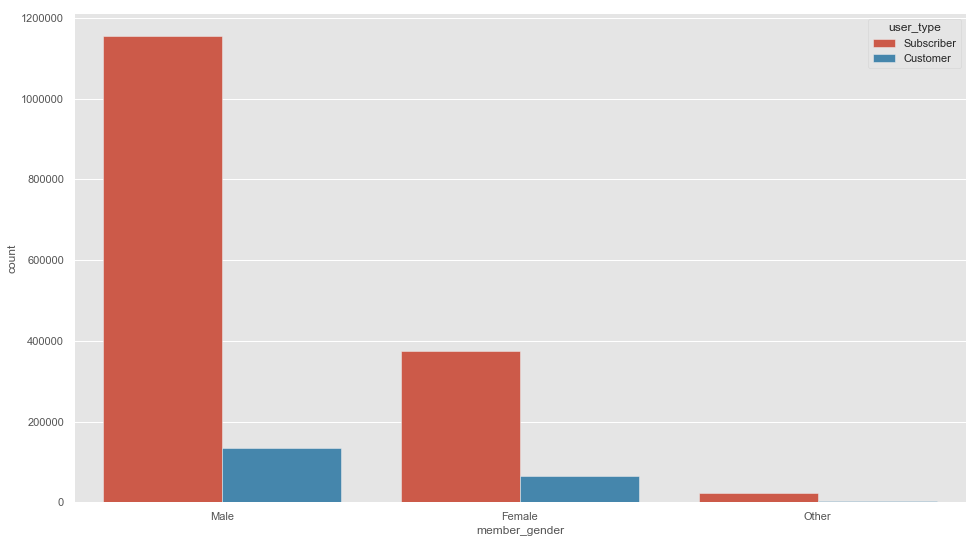

In [508]:
sns.countplot(data = member_clean, x = 'member_gender', hue = 'user_type');

(-0.26850957600666076, 1.2685095760066607)

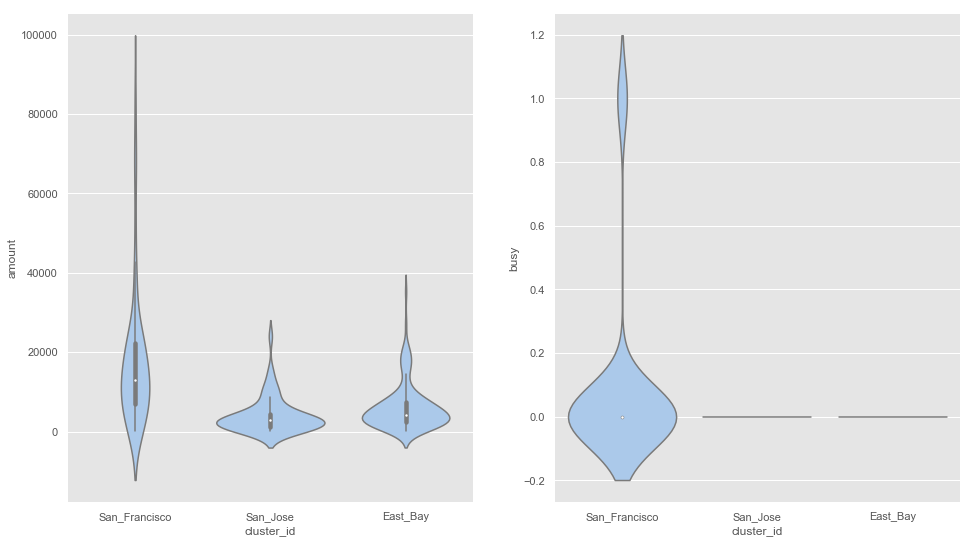

In [509]:
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = rent_short, x = 'cluster_id', y = 'amount', color = base_color)

plt.subplot(1, 2, 2)
ax1 = sns.violinplot(data = rent_short, x = 'cluster_id', y = 'busy', color = base_color);
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

In [519]:
list(rent_short)

['id',
 'latitude',
 'longitude',
 'name',
 'amount',
 'log_amount',
 'cluster_id',
 'busy']

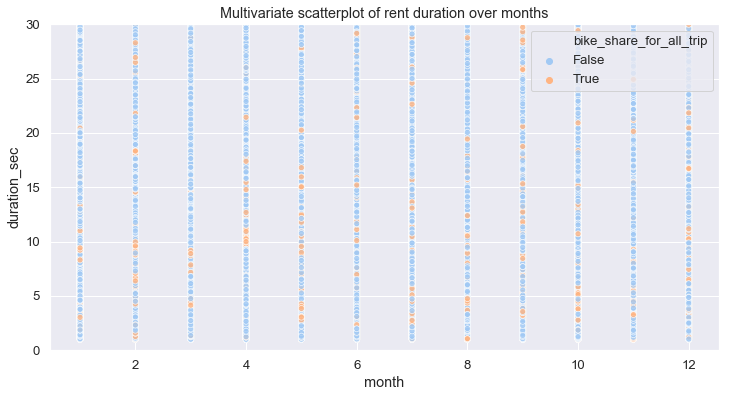

In [366]:
ax = sns.scatterplot(x=rent_clean.month, y=rent_clean.duration_sec/60,
                      hue=rent_clean.bike_share_for_all_trip, alpha=.8)
ax.set_ylim(0, 25)
ax.set_ylim(0, 30)
ax.set_title("Multivariate scatterplot of rent duration over months");

In [516]:
copy = rent_clean.copy()
copy['user_type'] = member_clean['user_type']
copy['member_gender'] = member_clean['member_gender']
copy['age'] = member_clean['age']
copy['cluster_id'] = member_clean['age']

list(copy)

['rent_id',
 'bike_id',
 'bike_share_for_all_trip',
 'duration_sec',
 'start_station_id',
 'start_time',
 'end_station_id',
 'end_time',
 'year',
 'month',
 'hour',
 'user_type',
 'member_gender',
 'age']

In [517]:
g = sns.FacetGrid(data = copy, col = 'cluster_id', row = 'user_type', height = 5,
                margin_titles = True)
g.map(plt.violinplot, 'member_gender', 'age');


KeyError: 'cluster_id'

(11.999026155655747, 95.00097384434426)

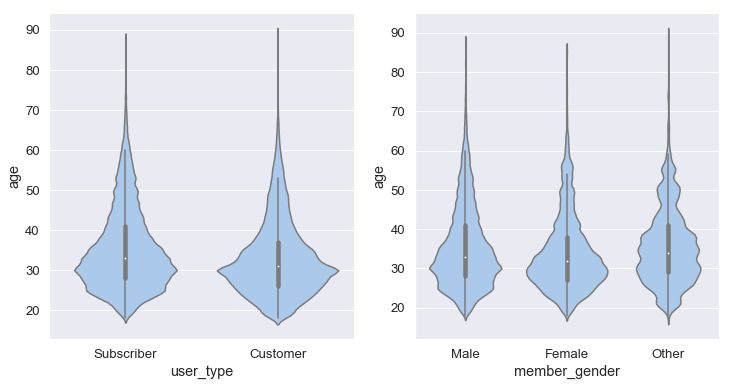

In [377]:
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sns.violinplot(data = member_clean, x = 'user_type', y = 'age', color = base_color)

plt.subplot(1, 2, 2)
ax1 = sns.violinplot(data = member_clean, x = 'member_gender', y = 'age', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

In [597]:
rent_short.head()

,id,latitude,longitude,name,amount,log_amount,cluster_id,busy
0,284,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,33858,4.529661,1,False
1,6,37.804770,-122.403234,The Embarcadero at Sansome St,119293,5.076615,1,True
2,93,37.770407,-122.391198,4th St at Mission Bay Blvd S,54527,4.736612,1,True
4,308,37.336802,-121.894090,San Pedro Square,8229,3.915347,0,False
5,312,37.329732,-121.901782,San Jose Diridon Station,19207,4.283460,0,False


Write `cluster_id` and `busy` to member dataframe

In [601]:
clustered_stations.head()

,latitude,longitude,cluster_id,id
0,37.784872,-122.400876,1,284.0
1,37.804770,-122.403234,1,6.0
2,37.770407,-122.391198,1,93.0
3,37.336802,-121.894090,0,308.0
4,37.329732,-121.901782,0,312.0


In [607]:
member_short = member_clean[:1000].copy()
member_short['id'] = rent_clean['start_station_id'][:1000]
# bring cluster id into rent_clean dataframe
member_short['cluster_id'] = -1
#member_short['busy'] = -1

for i, row in member_short.iterrows():
    # lookup table - look up the cluster id of the given station id and write to rent table
    station_id = row['id']
    frame = clustered_stations.query('id == @station_id')
    cluster_id = frame['cluster_id'].iloc[0]
    #busy = frame['busy'].iloc[0]
    # write to short rent table
    member_short.loc[i, 'cluster_id'] = cluster_id
    
    

In [624]:
member_short['cluster_id'] = member_short['cluster_id'].replace({0: 'San_Jose', 1: 'San_Francisco', 2: 'East_Bay'})

In [627]:
copy.groupby('cluster_id')['gender'].value_counts()

cluster_id     gender
East_Bay       Male      163
               Female     61
               Other       4
San_Francisco  Male      533
               Female    129
               Other      14
San_Jose       Male       49
               Female     12
               Other       1
Name: gender, dtype: int64

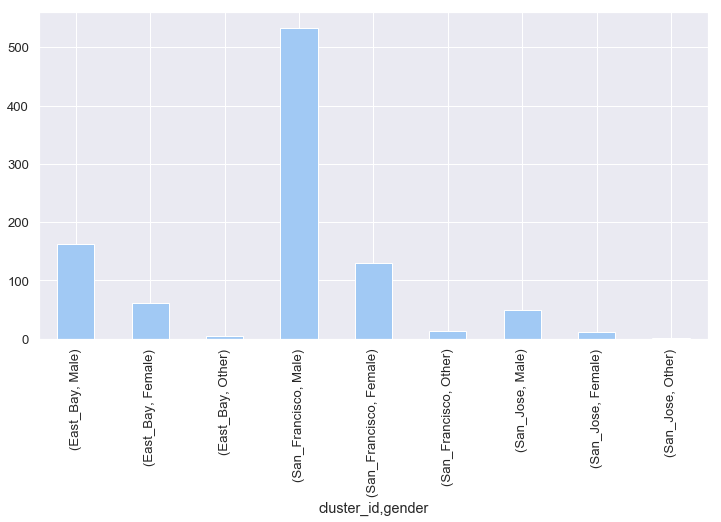

In [628]:
copy.groupby('cluster_id')['gender'].value_counts().plot(kind='bar');